<a href="https://colab.research.google.com/github/ryandeering/neural-networks-with-tensorflow/blob/main/Applied_Deep_Learning_and_AI_CA1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied Deep Learning and AI CA1 - Ryan Deering X00144631**


> Features: 81

> Seed: 93

> Errors: 0.37



# Introduction

This CA covers the beginning to end of defining the structure of a neural network, choosing what hyperparameters to use to achieve the best results and performance from the network. And then deploying that network into production by creating a binary file of the weights and the structure into JSON for future usage. 

There are a couple of mistakes, these are acknowledged in the conclusion and summary. But overall, I feel I tackled the problem well with good rationale for why I did this or that, fulfilling the requirements of the CA. I achieved an accuracy of 0.69 before any major overfitting began to occur with an error of 0.37. As documented, I tried to achieve the highest without any overfitting errors. 


# Imports

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import*

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets.samples_generator import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.models import model_from_yaml

# Creating the dataset


In [21]:
# fix random seed for reproducibility
np.random.seed(93)
tf.random.set_seed(93)

features = 81
classes = 5
n = 200000
errors = 0.37
redundant = int(features/4)



# Classification dataset
X, y = make_classification(n_samples=n, n_classes=classes, n_features=features, \
                           random_state = 1,n_informative =20, flip_y=errors, \
                           n_redundant=redundant)

# reshape y to 2D array, it needs to be to append
y = np.reshape(y, (-1, 1))

#add y to x
Xy = np.concatenate((X,y),axis=1)

np.savetxt("MyCAData.csv", Xy, delimiter=",")

print(Xy[:5])

data = pd.read_csv("MyCAData.csv")

data = shuffle(data,random_state=np.random.seed(93))
dataset = data.values
#to_categorical moved into data pre-processing, it's not here



X = dataset[:,0:81]
y = dataset[:,81]



[[ 1.74150016e+00 -8.83031032e-01  5.15039760e+00 -6.14713722e-01
  -1.49496606e+00  3.94407438e-01  3.16551453e+00 -4.39475064e-01
   7.64470346e-01  5.13090429e+00  2.09731451e+00  1.73190612e+00
   2.25465569e-02  3.17321133e-01  5.16623656e+00 -1.43812143e+00
   3.36229631e+00 -1.24525818e+00  7.49454412e-01 -2.30524296e-01
   1.54237799e-01 -3.52668137e+00 -1.58165333e+00  4.95695617e-01
  -5.03579844e+00  8.57433644e-01 -1.02184063e+00 -1.04969390e+00
  -7.56610008e+00 -3.61632048e-01  1.24776498e+00  2.01122719e+00
  -3.32650638e-01  1.19197325e+01 -1.44662184e+00  2.79696582e+00
   5.75411069e+00 -3.93674634e+00 -3.55540072e+00  2.48006512e+01
  -1.70193063e-01 -7.40713014e-01  1.44036209e+00 -1.74731598e+01
   2.57983788e+00  1.44049492e+00  7.69514080e-01  2.46443699e+00
  -4.71985475e+00  2.22882217e-02 -7.28912521e-01  9.05587594e-01
  -4.31618442e+00 -3.35490383e-01  1.11727682e+01 -6.44808800e-01
   4.54505520e+00 -3.59962633e+00 -1.66740427e+01  4.15018912e-01
  -1.34804

The dataset is generated, but we need to look into visualization and exploration. (more on the actual generation here)

# Data Exploration and Visualization

In [ ]:
print("Skek and description:\n--------------------------------")
print(data.skew())
print("Data Description:\n---------------------------------")
print(data.describe())

Skek and description:
--------------------------------
1.741500159374914869e+00     0.094439
-8.830310323752997848e-01    0.003107
5.150397599052741526e+00     0.017192
-6.147137221102183524e-01    0.001608
-1.494966064470657496e+00    0.000901
                               ...   
8.746234782349532333e-01     0.016211
2.594096506854321582e+00    -0.038771
-2.847202394579646800e-02   -0.002147
3.355897343794845417e-02    -0.007233
0.000000000000000000e+00     0.004446
Length: 82, dtype: float64
Data Description:
---------------------------------
       1.741500159374914869e+00  ...  0.000000000000000000e+00
count             199999.000000  ...             199999.000000
mean                  -0.208931  ...                  1.994110
std                    2.709402  ...                  1.414802
min                  -13.435483  ...                  0.000000
25%                   -2.029499  ...                  1.000000
50%                   -0.279815  ...                  2.000000
75%    

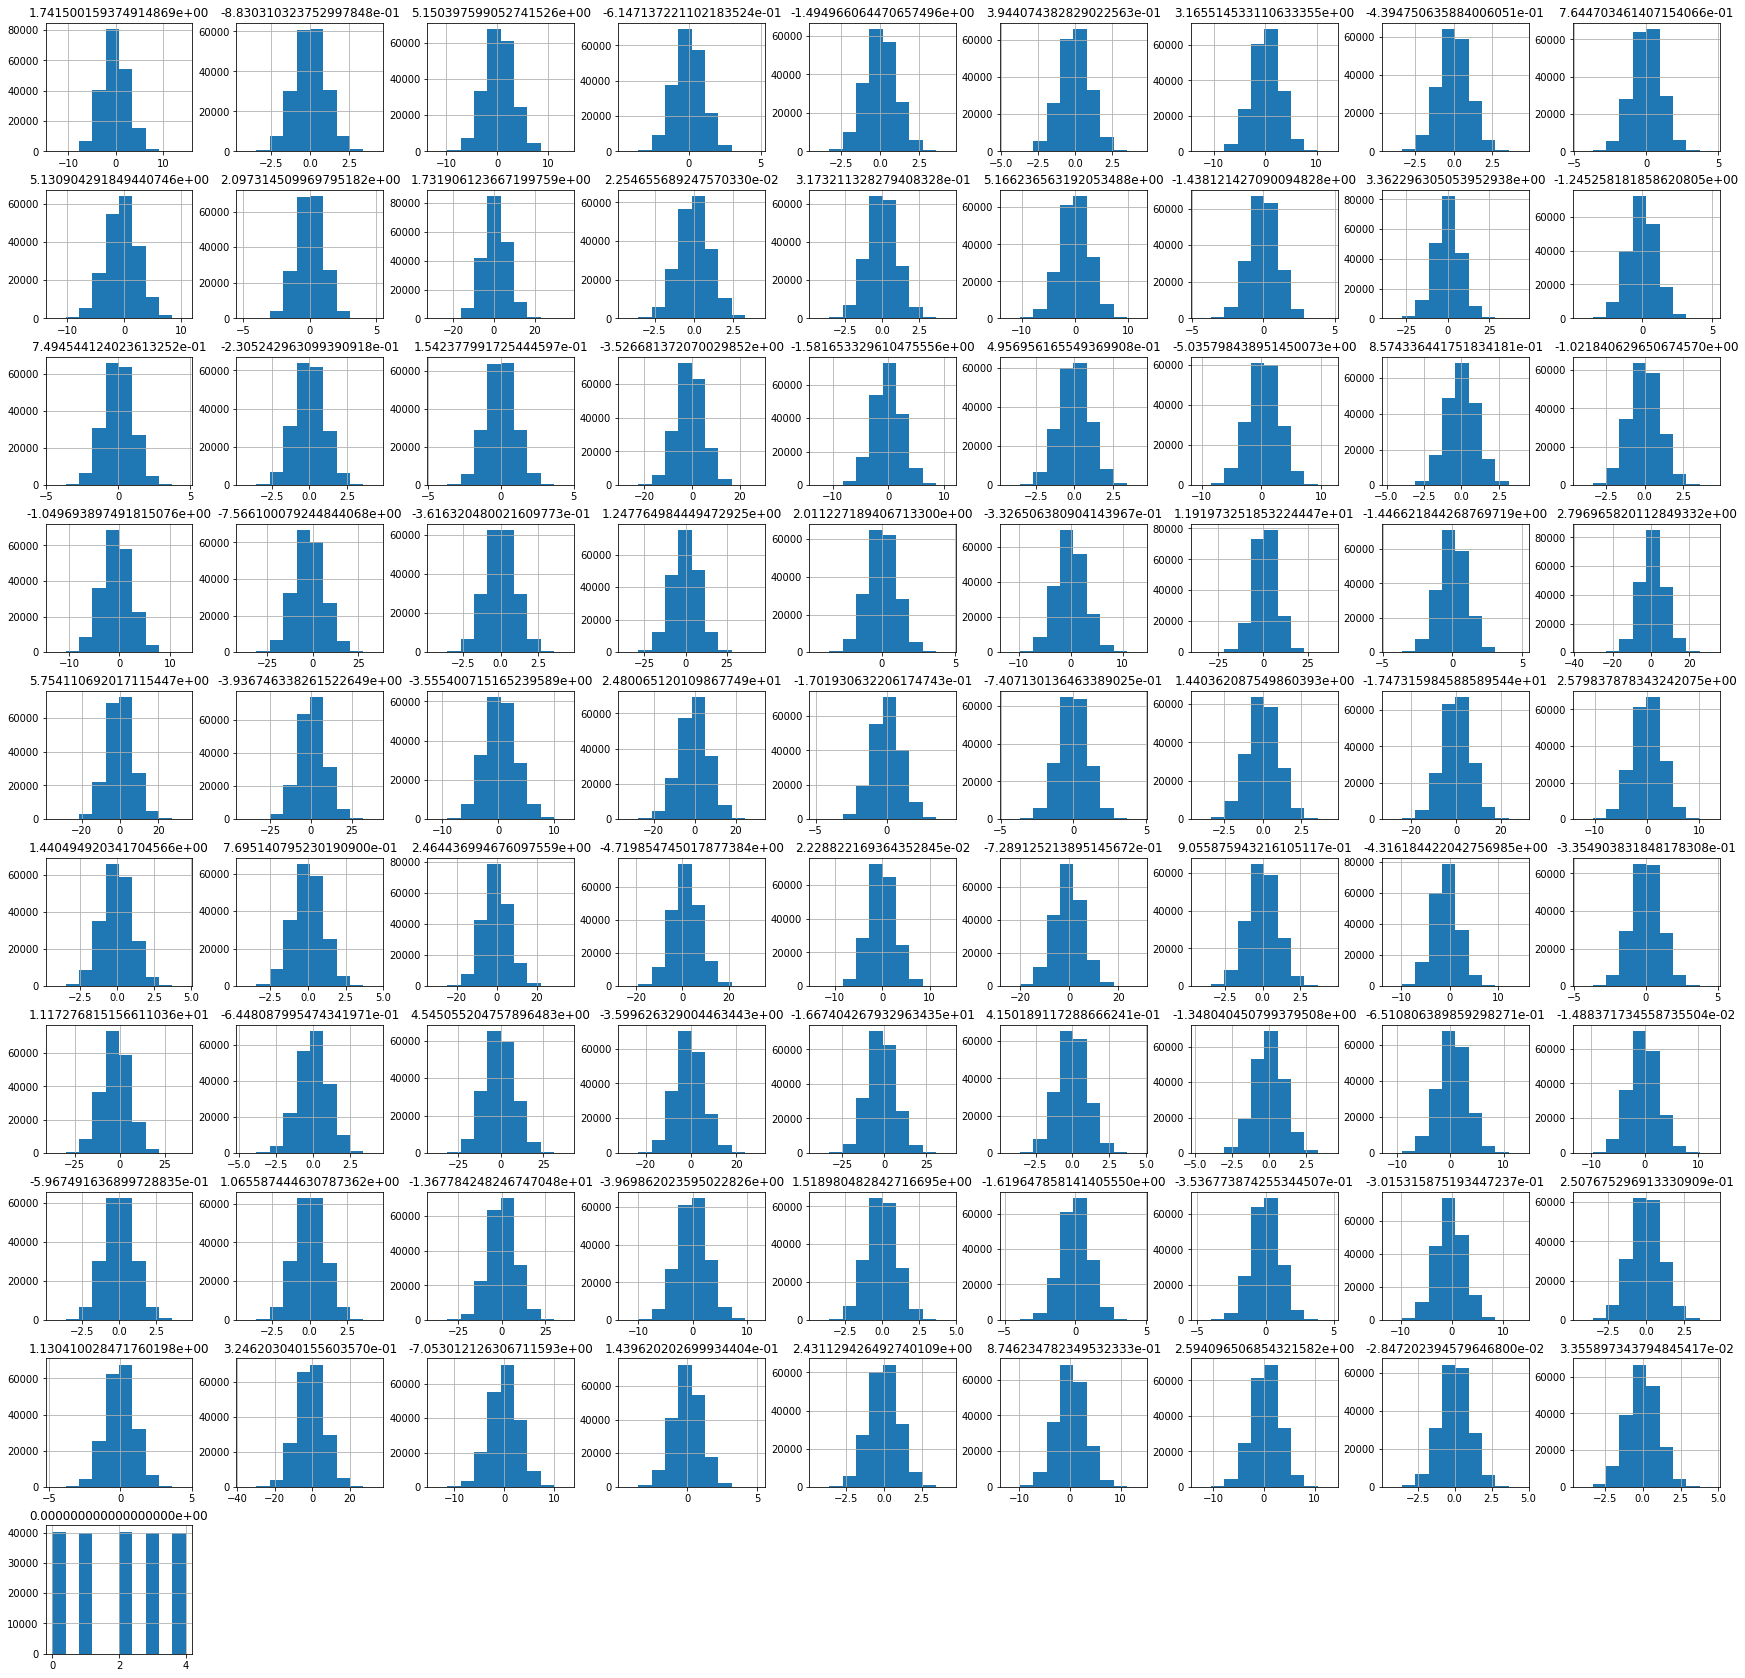

In [23]:
plt.rc('font', size =10)
data.hist(figsize=(30,30))
plt.show()

The data is in a gaussian distribution, which is to be expected. It's good to confirm this is the case.

In [ ]:
print(data.isnull().values.any())

print(data.isnull().sum().sum())

False
0


No missing data found.

In [ ]:
print("Correlation Table")
data.corr().unstack().sort_values().drop_duplicates()

Correlation Table


5.754110692017115447e+00   -1.367784248246747048e+01   -0.609475
-7.289125213895145672e-01  -3.936746338261522649e+00   -0.595697
3.362296305053952938e+00   2.796965820112849332e+00    -0.586611
                           -1.049693897491815076e+00   -0.474918
5.754110692017115447e+00   -1.667404267932963435e+01   -0.468973
                                                          ...   
-1.581653329610475556e+00  -7.289125213895145672e-01    0.516781
-3.599626329004463443e+00  -3.969862023595022826e+00    0.543980
1.247764984449472925e+00   4.545055204757896483e+00     0.598849
-3.599626329004463443e+00  -1.747315984588589544e+01    0.616291
1.741500159374914869e+00   1.741500159374914869e+00     1.000000
Length: 3322, dtype: float64

Dropping duplicate data.

# Data Preprocessing

In [ ]:
X = X / X.max(axis=0)
encoded_y = to_categorical(y)



Normalizing the data, there's very little pre-processing to do otherwise. This is to is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Helps maintain the distribution, while we couldn't detect any outliers in the histogram, it is still good practice.

#Model exploration to determine network topology

Epoch 1/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.4113 - acc: 0.4450 - val_loss: 1.2475 - val_acc: 0.5912
Epoch 2/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.2304 - acc: 0.6034 - val_loss: 1.2201 - val_acc: 0.6200
Epoch 3/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.2032 - acc: 0.6239 - val_loss: 1.2062 - val_acc: 0.6296
Epoch 4/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1887 - acc: 0.6330 - val_loss: 1.2005 - val_acc: 0.6360
Epoch 5/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1827 - acc: 0.6400 - val_loss: 1.1968 - val_acc: 0.6398
Epoch 6/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1786 - acc: 0.6427 - val_loss: 1.1955 - val_acc: 0.6409
Epoch 7/10
4188/4188 [==============================] - 7s 2ms/step - loss: 1.1721 - acc: 0.6450 - val_loss: 1.1944 - val_acc: 0.6408
Epoch 8/10
4188/4188 [==============================] - 7s 2ms

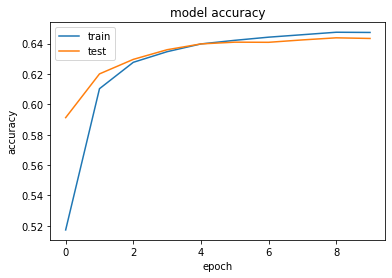

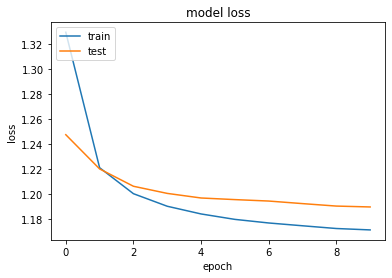

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(50, input_dim=81, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 1:** Starting off with the default values, we can see that the network is suffering a little overfitting after around 10 epochs of learning. The training set has quickly trained with a low amount of loss, but the test set, which is the most important set to factor in when beginning to evaluate a network's topology, is suffering from low accuracy and high loss. This means essentially that the model is making really poor predictions on data it has never seen before.

We will continue to use the data split, to determine overfitting and underfitting in our model. We will also keep our output layer's nodes at 5 to produce the final result, as well as the activation function being softmax as this is a multi-class classification problem where we need to normalize the output of the network over several predicted output classes, being 6 of them. 

Epoch 1/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.3526 - acc: 0.4863 - val_loss: 1.1727 - val_acc: 0.6331
Epoch 2/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1544 - acc: 0.6423 - val_loss: 1.1491 - val_acc: 0.6498
Epoch 3/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.1267 - acc: 0.6544 - val_loss: 1.1327 - val_acc: 0.6564
Epoch 4/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.1082 - acc: 0.6626 - val_loss: 1.1251 - val_acc: 0.6619
Epoch 5/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.0963 - acc: 0.6693 - val_loss: 1.1227 - val_acc: 0.6643
Epoch 6/10
4188/4188 [==============================] - 10s 2ms/step - loss: 1.0892 - acc: 0.6705 - val_loss: 1.1207 - val_acc: 0.6654
Epoch 7/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.0794 - acc: 0.6752 - val_loss: 1.1143 - val_acc: 0.6701
Epoch 8/10
4188/4188 [==============================] - 10s 2

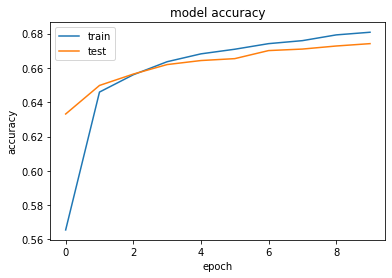

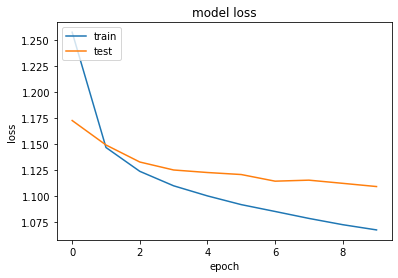

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(100, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 2:** *Increases to capacity and depth of the network.* An extra layer has been added to see if it makes a difference to the training of the dataset. The answer is: yes, it does. The extra layer adds dimension in our network, to enable us to tackle our problem. We can see that on our first epoch of Investigation 1, we end with a loss of 1.6238 and an accuracy of 0.4674. In that same position in Investigation, we end our first epoch with a loss of 1.2791 and an accuracy of 0.5506.

We can see that increasing capacity and depth does help to help solve a difficult problem. 

Epoch 1/10
4188/4188 [==============================] - 70s 17ms/step - loss: 1.2763 - acc: 0.5548 - val_loss: 1.1422 - val_acc: 0.6558
Epoch 2/10
4188/4188 [==============================] - 71s 17ms/step - loss: 1.1083 - acc: 0.6676 - val_loss: 1.1212 - val_acc: 0.6730
Epoch 3/10
4188/4188 [==============================] - 69s 16ms/step - loss: 1.0658 - acc: 0.6819 - val_loss: 1.1115 - val_acc: 0.6783
Epoch 4/10
4188/4188 [==============================] - 69s 16ms/step - loss: 1.0252 - acc: 0.6901 - val_loss: 1.1194 - val_acc: 0.6769
Epoch 5/10
4188/4188 [==============================] - 68s 16ms/step - loss: 0.9767 - acc: 0.6968 - val_loss: 1.1492 - val_acc: 0.6693
Epoch 6/10
4188/4188 [==============================] - 69s 17ms/step - loss: 0.9128 - acc: 0.7038 - val_loss: 1.1934 - val_acc: 0.6576
Epoch 7/10
4188/4188 [==============================] - 87s 21ms/step - loss: 0.8217 - acc: 0.7205 - val_loss: 1.2730 - val_acc: 0.6372
Epoch 8/10
4188/4188 [==========================

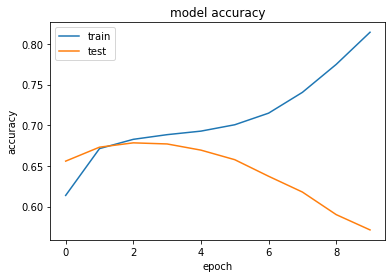

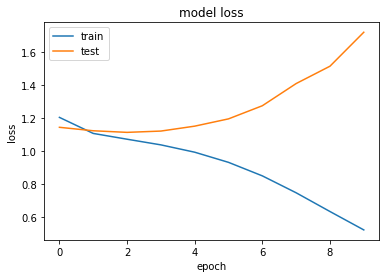

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(2000, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(500 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 3:** *Increases to the capacity of the network.* We have kept our additional hidden layer in Investigation 2 in an attempt to see if our accuracy would increase while not being overly concerned with the amount of loss generated. The increase of capacity almost certainly enabled a higher accuracy, but at the cost of much, much higher overfitting, and much more quickly as well. This can be seen in both the model loss and accuracy graphs, as the training and test sets begin to diverge at a rabid rate past the 4th epoch of training. This is not good at all regarding the test set, as it means our predictions will be absolutely terrible.

Epoch 1/10
4188/4188 [==============================] - 297s 71ms/step - loss: 1.2657 - acc: 0.5593 - val_loss: 1.1074 - val_acc: 0.6663
Epoch 2/10
4188/4188 [==============================] - 301s 72ms/step - loss: 1.0812 - acc: 0.6744 - val_loss: 1.0889 - val_acc: 0.6754
Epoch 3/10
4188/4188 [==============================] - 303s 72ms/step - loss: 1.0472 - acc: 0.6858 - val_loss: 1.0843 - val_acc: 0.6755
Epoch 4/10
4188/4188 [==============================] - 302s 72ms/step - loss: 1.0111 - acc: 0.6952 - val_loss: 1.0975 - val_acc: 0.6746
Epoch 5/10
4188/4188 [==============================] - 303s 72ms/step - loss: 0.9632 - acc: 0.7041 - val_loss: 1.1296 - val_acc: 0.6658
Epoch 6/10
4188/4188 [==============================] - 306s 73ms/step - loss: 0.8864 - acc: 0.7167 - val_loss: 1.1840 - val_acc: 0.6557
Epoch 7/10
4188/4188 [==============================] - 301s 72ms/step - loss: 0.7807 - acc: 0.7375 - val_loss: 1.2821 - val_acc: 0.6358
Epoch 8/10
4188/4188 [===================

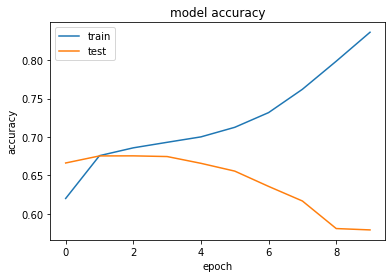

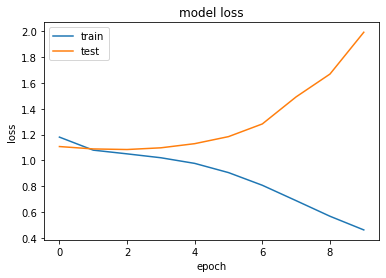

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(2000, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1500 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(800 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 4:** *Increases to the capacity and depth of the network.* We have added an additional hidden layer to see if this will improve our accuracy for a total for three hidden layers sandwiched between the input and output layers. The extra layer seems to improve accuracy but again, it massively overfits once again. The overall training loss has increased from 1.71 to 1.99, which is terrible for a very minute difference in accuracy with the training set. Our model is learning too well with the current set of layers and capacity, to the point where it is harming data not in the training set. This will make for terrible predictions.

Epoch 1/5
4188/4188 [==============================] - 185s 44ms/step - loss: 1.2698 - acc: 0.5507 - val_loss: 1.1017 - val_acc: 0.6637
Epoch 2/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0758 - acc: 0.6731 - val_loss: 1.0786 - val_acc: 0.6759
Epoch 3/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0480 - acc: 0.6853 - val_loss: 1.0748 - val_acc: 0.6742
Epoch 4/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0223 - acc: 0.6951 - val_loss: 1.0774 - val_acc: 0.6741
Epoch 5/5
4188/4188 [==============================] - 183s 44ms/step - loss: 0.9946 - acc: 0.7030 - val_loss: 1.0937 - val_acc: 0.6715


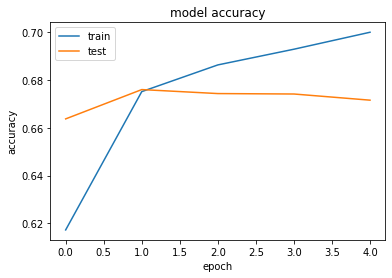

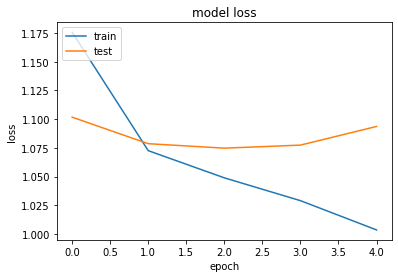

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1900, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1300 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(700 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 5:** *Decreases to the capacity of the network. Increases to the depth of the network.* We have tried to add an additional layer and decreased the epochs of the training set. We seem to be getting a recurring result, where the loss seems to rabidly increase once hitting around 70% accuracy. I am inclined to believe this is because of the *flip_y* variable of the Sklearn make_classification function, inducing artificial errors in the dataset. Because there is artificial errors in the dataset, we can only achieve an accuracy high enough before there is rabid overfitting of the model. We do not want overfitting, so we will look to use early stopping in the future to prevent this.  

Epoch 1/5
4188/4188 [==============================] - 109s 26ms/step - loss: 1.2680 - acc: 0.5490 - val_loss: 1.0966 - val_acc: 0.6638
Epoch 2/5
4188/4188 [==============================] - 112s 27ms/step - loss: 1.0726 - acc: 0.6736 - val_loss: 1.0767 - val_acc: 0.6745
Epoch 3/5
4188/4188 [==============================] - 110s 26ms/step - loss: 1.0470 - acc: 0.6853 - val_loss: 1.0674 - val_acc: 0.6774
Epoch 4/5
4188/4188 [==============================] - 115s 27ms/step - loss: 1.0278 - acc: 0.6937 - val_loss: 1.0768 - val_acc: 0.6730
Epoch 5/5
4188/4188 [==============================] - 114s 27ms/step - loss: 1.0098 - acc: 0.7001 - val_loss: 1.0746 - val_acc: 0.6760


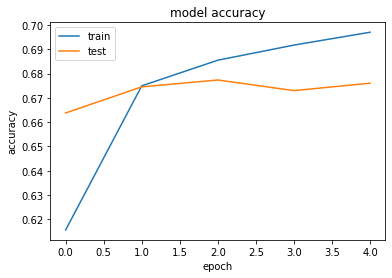

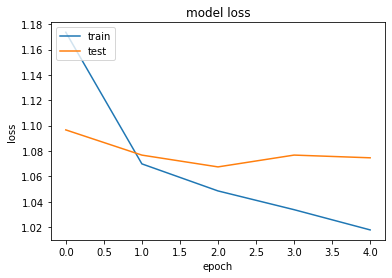

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 6:** *Decreases to the capacity of the network..* We have kept our existing hidden layers but decreased the capacity of the network to see if we can get a better result. Does seem to wield a better result with the third epoch than Investigation 5, with val_acc and val_loss being slightly better. Marginally better, but better regardless. We can see some slight overfitting but not a huge amount that can't be stopped with early stopping. 

Epoch 1/4
4188/4188 [==============================] - 112s 27ms/step - loss: 1.2936 - acc: 0.5288 - val_loss: 1.0910 - val_acc: 0.6649
Epoch 2/4
4188/4188 [==============================] - 110s 26ms/step - loss: 1.0738 - acc: 0.6720 - val_loss: 1.0731 - val_acc: 0.6746
Epoch 3/4
4188/4188 [==============================] - 109s 26ms/step - loss: 1.0496 - acc: 0.6845 - val_loss: 1.0648 - val_acc: 0.6769
Epoch 4/4
4188/4188 [==============================] - 109s 26ms/step - loss: 1.0323 - acc: 0.6931 - val_loss: 1.0677 - val_acc: 0.6767


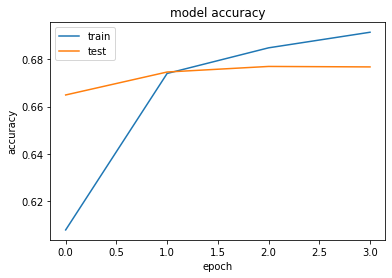

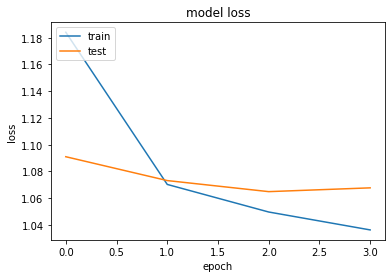

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(100 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=4)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 7:** *Increase in capacity and depth to the network* We have added another hidden layer to see if we can yield a better result before, changing the epochs to 4 for early stopping. Results are mixed, it seems to be performing better on the the training set, but performing worse on the test set compared to **Investigation 6**. The test set is really what matters, so we can say at this point that adding another layer to the network is not performant or better for the network at this time. 

Epoch 1/10
4188/4188 [==============================] - 97s 23ms/step - loss: 1.2670 - acc: 0.5535 - val_loss: 1.1100 - val_acc: 0.6647
Epoch 2/10
4188/4188 [==============================] - 96s 23ms/step - loss: 1.0805 - acc: 0.6739 - val_loss: 1.0907 - val_acc: 0.6761
Epoch 3/10
4188/4188 [==============================] - 97s 23ms/step - loss: 1.0471 - acc: 0.6865 - val_loss: 1.0855 - val_acc: 0.6771
Epoch 4/10
4188/4188 [==============================] - 99s 24ms/step - loss: 1.0111 - acc: 0.6949 - val_loss: 1.0939 - val_acc: 0.6762
Epoch 5/10
4188/4188 [==============================] - 99s 24ms/step - loss: 0.9617 - acc: 0.7037 - val_loss: 1.1208 - val_acc: 0.6694
Epoch 6/10
4188/4188 [==============================] - 99s 24ms/step - loss: 0.8865 - acc: 0.7147 - val_loss: 1.1887 - val_acc: 0.6563
Epoch 7/10
4188/4188 [==============================] - 100s 24ms/step - loss: 0.7774 - acc: 0.7345 - val_loss: 1.2850 - val_acc: 0.6408
Epoch 8/10
4188/4188 [=========================

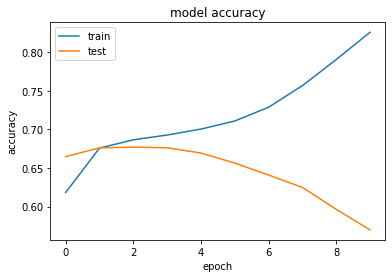

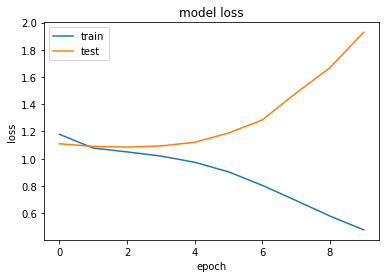

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1400, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 8:** *Decreases to depth and capacity.* We have removed the hidden layer from **Investigation 7** and upped the epochs of the network once again. As we can tell once again, the overfitting seems to occur around the fourth to fifth epoch. This is beginning to be a constant, around the 67% - 70% accuracy mark. However, performance does differ compared to **Investigation 7**. We can see around that third epoch, that performance is slightly better with a higher accuracy than the prior model, but the loss in this test set is slightly worse in this model. Accuracy is the key, so this model is technically better around that epoch before overfitting starts. But we should take that higher loss in mind. 

Epoch 1/10
4188/4188 [==============================] - 47s 11ms/step - loss: 1.2667 - acc: 0.5497 - val_loss: 1.1030 - val_acc: 0.6639
Epoch 2/10
4188/4188 [==============================] - 47s 11ms/step - loss: 1.0784 - acc: 0.6726 - val_loss: 1.0838 - val_acc: 0.6761
Epoch 3/10
4188/4188 [==============================] - 48s 11ms/step - loss: 1.0493 - acc: 0.6852 - val_loss: 1.0760 - val_acc: 0.6776
Epoch 4/10
4188/4188 [==============================] - 48s 11ms/step - loss: 1.0233 - acc: 0.6945 - val_loss: 1.0795 - val_acc: 0.6782
Epoch 5/10
4188/4188 [==============================] - 47s 11ms/step - loss: 0.9943 - acc: 0.7004 - val_loss: 1.0955 - val_acc: 0.6725
Epoch 6/10
4188/4188 [==============================] - 48s 11ms/step - loss: 0.9622 - acc: 0.7054 - val_loss: 1.1258 - val_acc: 0.6656
Epoch 7/10
4188/4188 [==============================] - 48s 11ms/step - loss: 0.9102 - acc: 0.7143 - val_loss: 1.1551 - val_acc: 0.6608
Epoch 8/10
4188/4188 [==========================

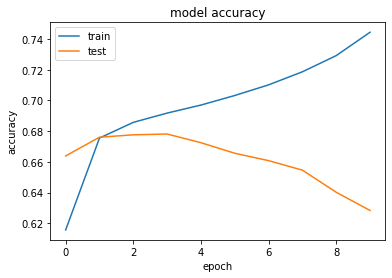

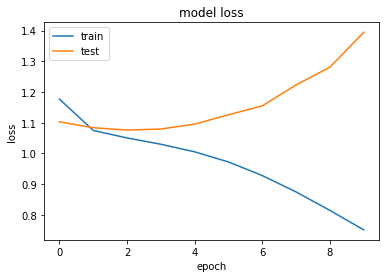

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(800, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(400 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 9:** *Decreases to capacity* Very similar performance to Investigation 8, but with less accuracy and higher loss in the training set, marginal gains in the test set. Not much changed beyond that.  

Epoch 1/5
4188/4188 [==============================] - 28s 7ms/step - loss: 1.2751 - acc: 0.5425 - val_loss: 1.1138 - val_acc: 0.6566
Epoch 2/5
4188/4188 [==============================] - 26s 6ms/step - loss: 1.0890 - acc: 0.6654 - val_loss: 1.0905 - val_acc: 0.6726
Epoch 3/5
4188/4188 [==============================] - 25s 6ms/step - loss: 1.0555 - acc: 0.6830 - val_loss: 1.0746 - val_acc: 0.6788
Epoch 4/5
4188/4188 [==============================] - 27s 6ms/step - loss: 1.0272 - acc: 0.6921 - val_loss: 1.0799 - val_acc: 0.6790
Epoch 5/5
4188/4188 [==============================] - 26s 6ms/step - loss: 1.0018 - acc: 0.6984 - val_loss: 1.0943 - val_acc: 0.6736


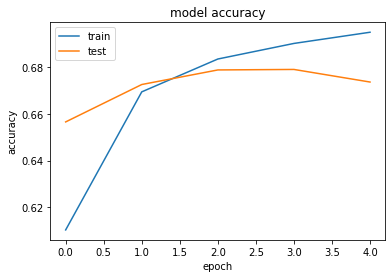

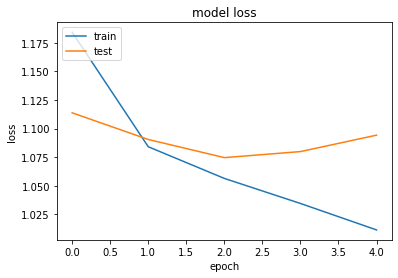

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(700, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(300 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(100 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Investigation 10: *Decreases to capacity.* We can see that the model is performing better than **Investigation 9** but there is still a degree of overfitting involved, however loss and accuracy is better all around than **Investigation 9** so we can determine less neurons is better with this current model. 

# Determining the best model from the results we have

We have made 10 investigations, and must determine the best model we have to use.

Let's establish criteria:

*   We have to achieve to a bias-tradeoff, i.e a perfect balance between underfitting and overfitting. 
*   Our focus is on accuracy, with a bias towards the accuracy of the test set, because this is we are making the actual predictions on. 
*   We are working off basically marginal gains, most models perform the same beyond a certain point. They're all around the same ballpark performance we should expect.

Let's discuss what we noticed. The network struggles with this dataset beyond 67-70%. This is due to the artificial errors induced in the dataset, that being the flip_y parameter. Let's examine the sci-py documentation for this parameter:

**"The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder."**

This makes a lot of sense as to why our model won't generalize beyond a certain point, that being the 67%-70% accuracy mark. Our error is 0.37. 

To determine the best model, I will take a look at the results in Microsoft Excel, examining the best performing model results before noticable overfitting begins to occur. 

I examined every investigation, taking their best results before the overfitting starts in an extreme way.

The idea is to get the highest accuracy between the two training and test variables, but also the least loss between the training and test variables. 


I settled on **Investigation 6**, due to it having little loss between the two sets and an accuracy of just over 70%, being the third highest of the investigations overall. However, the two investigations above it (*I ruled out Investigation 3 due to overfitting*) have a higher variance between the training sets and test sets, so Investigation 6 is a well-performing, non-biased as possible model. The bias-trade off has been made, and 6 is the winner.

[I have included the link to the Google Sheets here. ](https://docs.google.com/spreadsheets/d/1mKmxhN-QYXAiXuvJAhLo-uXzX8x79KeGLtaYGU-mBOM/edit?usp=sharing)



**To sum up changes made:** 

**7 changes to the input layer**

**5 changes to the depth of the network**

**10 changes to the capacity of the network**

# Initial hyperparameter investigation 

We have our model now, but what do we do? We investigate the best possible hyperparameters for our model. These include the batch size, the amount of epochs, and optimizers.

I will start by determining the best batch size and epochs, after that, the best optimiser, for the model.

**Batch Size: 64, Epochs: 10**

Epoch 1/10
2094/2094 [==============================] - 74s 35ms/step - loss: 1.2737 - acc: 0.5437 - val_loss: 1.0906 - val_acc: 0.6672
Epoch 2/10
2094/2094 [==============================] - 75s 36ms/step - loss: 1.0705 - acc: 0.6749 - val_loss: 1.0771 - val_acc: 0.6768
Epoch 3/10
2094/2094 [==============================] - 79s 38ms/step - loss: 1.0426 - acc: 0.6868 - val_loss: 1.0682 - val_acc: 0.6770
Epoch 4/10
2094/2094 [==============================] - 73s 35ms/step - loss: 1.0202 - acc: 0.6965 - val_loss: 1.0691 - val_acc: 0.6773
Epoch 5/10
2094/2094 [==============================] - 75s 36ms/step - loss: 0.9978 - acc: 0.7024 - val_loss: 1.0804 - val_acc: 0.6752
Epoch 6/10
2094/2094 [==============================] - 74s 35ms/step - loss: 0.9669 - acc: 0.7095 - val_loss: 1.1030 - val_acc: 0.6696
Epoch 7/10
2094/2094 [==============================] - 74s 36ms/step - loss: 0.9188 - acc: 0.7185 - val_loss: 1.1293 - val_acc: 0.6660
Epoch 8/10
2094/2094 [==========================

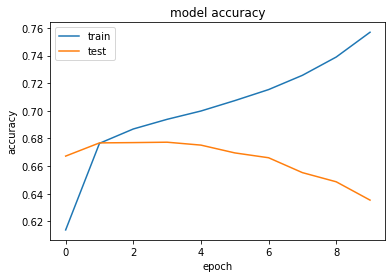

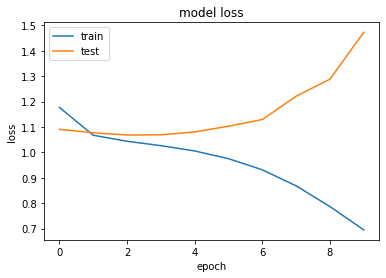

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10,batch_size=64)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 128, Epochs: 15**

Epoch 1/15
1047/1047 [==============================] - 53s 50ms/step - loss: 1.2872 - acc: 0.5304 - val_loss: 1.0946 - val_acc: 0.6636
Epoch 2/15
1047/1047 [==============================] - 52s 50ms/step - loss: 1.0739 - acc: 0.6736 - val_loss: 1.0741 - val_acc: 0.6777
Epoch 3/15
1047/1047 [==============================] - 53s 50ms/step - loss: 1.0429 - acc: 0.6871 - val_loss: 1.0712 - val_acc: 0.6782
Epoch 4/15
1047/1047 [==============================] - 53s 51ms/step - loss: 1.0165 - acc: 0.6980 - val_loss: 1.0725 - val_acc: 0.6745
Epoch 5/15
1047/1047 [==============================] - 51s 49ms/step - loss: 0.9925 - acc: 0.7045 - val_loss: 1.0827 - val_acc: 0.6739
Epoch 6/15
1047/1047 [==============================] - 51s 49ms/step - loss: 0.9647 - acc: 0.7093 - val_loss: 1.1046 - val_acc: 0.6686
Epoch 7/15
1047/1047 [==============================] - 54s 51ms/step - loss: 0.9157 - acc: 0.7195 - val_loss: 1.1402 - val_acc: 0.6599
Epoch 8/15
1047/1047 [==========================

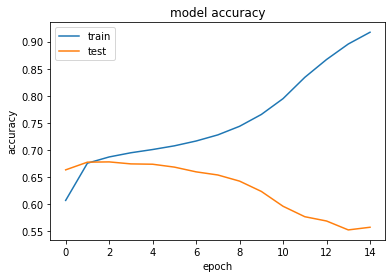

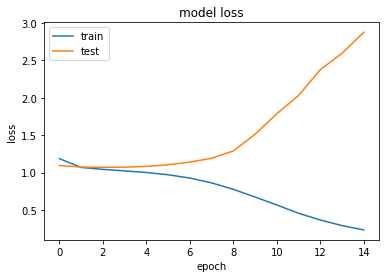

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=15,batch_size=128)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 256, Epochs: 20**

Epoch 1/20
524/524 [==============================] - 44s 84ms/step - loss: 1.3147 - acc: 0.5086 - val_loss: 1.1117 - val_acc: 0.6538
Epoch 2/20
524/524 [==============================] - 45s 86ms/step - loss: 1.0843 - acc: 0.6680 - val_loss: 1.0772 - val_acc: 0.6729
Epoch 3/20
524/524 [==============================] - 44s 83ms/step - loss: 1.0449 - acc: 0.6848 - val_loss: 1.0755 - val_acc: 0.6761
Epoch 4/20
524/524 [==============================] - 42s 81ms/step - loss: 1.0199 - acc: 0.6956 - val_loss: 1.0712 - val_acc: 0.6781
Epoch 5/20
524/524 [==============================] - 43s 82ms/step - loss: 0.9953 - acc: 0.7028 - val_loss: 1.0781 - val_acc: 0.6757
Epoch 6/20
524/524 [==============================] - 43s 83ms/step - loss: 0.9721 - acc: 0.7087 - val_loss: 1.0943 - val_acc: 0.6693
Epoch 7/20
524/524 [==============================] - 45s 85ms/step - loss: 0.9336 - acc: 0.7165 - val_loss: 1.1187 - val_acc: 0.6627
Epoch 8/20
524/524 [==============================] - 42s 81ms

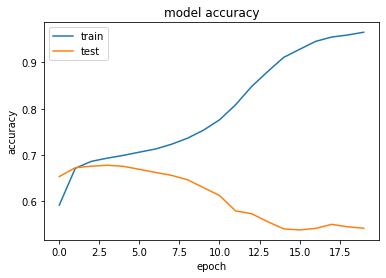

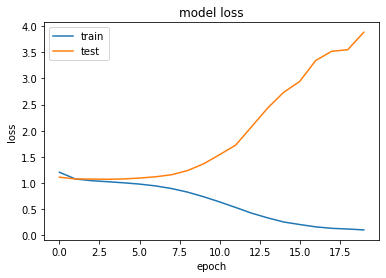

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=20,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 512, Epochs: 25**

Epoch 1/25
262/262 [==============================] - 38s 144ms/step - loss: 1.3585 - acc: 0.4768 - val_loss: 1.1265 - val_acc: 0.6493
Epoch 2/25
262/262 [==============================] - 37s 142ms/step - loss: 1.1012 - acc: 0.6593 - val_loss: 1.0926 - val_acc: 0.6652
Epoch 3/25
262/262 [==============================] - 37s 142ms/step - loss: 1.0548 - acc: 0.6800 - val_loss: 1.0766 - val_acc: 0.6752
Epoch 4/25
262/262 [==============================] - 37s 141ms/step - loss: 1.0292 - acc: 0.6914 - val_loss: 1.0716 - val_acc: 0.6767
Epoch 5/25
262/262 [==============================] - 37s 141ms/step - loss: 1.0061 - acc: 0.6994 - val_loss: 1.0777 - val_acc: 0.6747
Epoch 6/25
262/262 [==============================] - 38s 143ms/step - loss: 0.9861 - acc: 0.7033 - val_loss: 1.0892 - val_acc: 0.6725
Epoch 7/25
262/262 [==============================] - 38s 144ms/step - loss: 0.9558 - acc: 0.7110 - val_loss: 1.1002 - val_acc: 0.6687
Epoch 8/25
262/262 [==============================] - 3

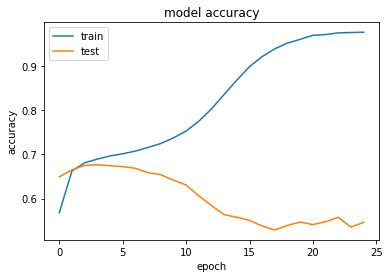

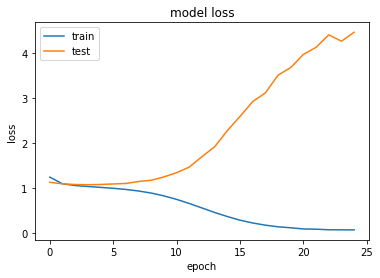

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=25,batch_size=512)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 1024, Epochs: 30**

Epoch 1/30
131/131 [==============================] - 34s 259ms/step - loss: 1.4124 - acc: 0.4418 - val_loss: 1.1554 - val_acc: 0.6339
Epoch 2/30
131/131 [==============================] - 34s 259ms/step - loss: 1.1255 - acc: 0.6485 - val_loss: 1.1153 - val_acc: 0.6508
Epoch 3/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0736 - acc: 0.6704 - val_loss: 1.0874 - val_acc: 0.6664
Epoch 4/30
131/131 [==============================] - 33s 254ms/step - loss: 1.0430 - acc: 0.6841 - val_loss: 1.0855 - val_acc: 0.6685
Epoch 5/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0209 - acc: 0.6924 - val_loss: 1.0785 - val_acc: 0.6725
Epoch 6/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0035 - acc: 0.6980 - val_loss: 1.0848 - val_acc: 0.6712
Epoch 7/30
131/131 [==============================] - 33s 254ms/step - loss: 0.9821 - acc: 0.7046 - val_loss: 1.0906 - val_acc: 0.6682
Epoch 8/30
131/131 [==============================] - 3

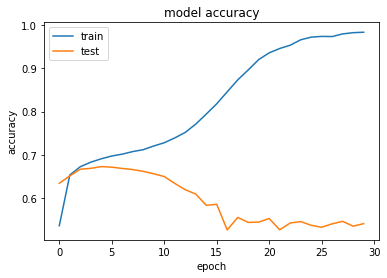

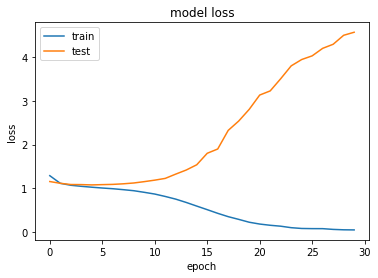

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=30,batch_size=1024)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 2048, Epochs: 35**

Epoch 1/35
66/66 [==============================] - 33s 485ms/step - loss: 1.4692 - acc: 0.4012 - val_loss: 1.1962 - val_acc: 0.6066
Epoch 2/35
66/66 [==============================] - 32s 479ms/step - loss: 1.1609 - acc: 0.6295 - val_loss: 1.1378 - val_acc: 0.6457
Epoch 3/35
66/66 [==============================] - 32s 480ms/step - loss: 1.1021 - acc: 0.6613 - val_loss: 1.1046 - val_acc: 0.6598
Epoch 4/35
66/66 [==============================] - 32s 479ms/step - loss: 1.0664 - acc: 0.6734 - val_loss: 1.0974 - val_acc: 0.6609
Epoch 5/35
66/66 [==============================] - 32s 479ms/step - loss: 1.0412 - acc: 0.6831 - val_loss: 1.0943 - val_acc: 0.6653
Epoch 6/35
66/66 [==============================] - 32s 480ms/step - loss: 1.0252 - acc: 0.6892 - val_loss: 1.0908 - val_acc: 0.6656
Epoch 7/35
66/66 [==============================] - 31s 478ms/step - loss: 1.0050 - acc: 0.6956 - val_loss: 1.0960 - val_acc: 0.6685
Epoch 8/35
66/66 [==============================] - 32s 482ms/step - 

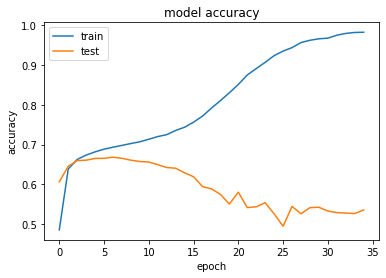

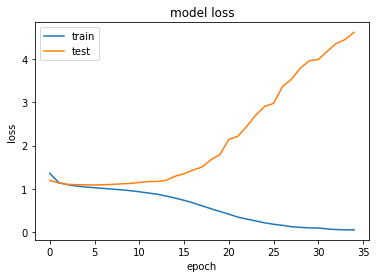

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=35,batch_size=2048)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 4096, Epochs: 40**

Epoch 1/40
33/33 [==============================] - 32s 947ms/step - loss: 1.5293 - acc: 0.3611 - val_loss: 1.3097 - val_acc: 0.5181
Epoch 2/40
33/33 [==============================] - 31s 941ms/step - loss: 1.2569 - acc: 0.5592 - val_loss: 1.1775 - val_acc: 0.6231
Epoch 3/40
33/33 [==============================] - 31s 939ms/step - loss: 1.1452 - acc: 0.6380 - val_loss: 1.1401 - val_acc: 0.6457
Epoch 4/40
33/33 [==============================] - 31s 948ms/step - loss: 1.1025 - acc: 0.6603 - val_loss: 1.1225 - val_acc: 0.6522
Epoch 5/40
33/33 [==============================] - 31s 944ms/step - loss: 1.0785 - acc: 0.6704 - val_loss: 1.1073 - val_acc: 0.6589
Epoch 6/40
33/33 [==============================] - 31s 947ms/step - loss: 1.0538 - acc: 0.6795 - val_loss: 1.1021 - val_acc: 0.6618
Epoch 7/40
33/33 [==============================] - 31s 953ms/step - loss: 1.0342 - acc: 0.6852 - val_loss: 1.0957 - val_acc: 0.6648
Epoch 8/40
33/33 [==============================] - 31s 947ms/step - 

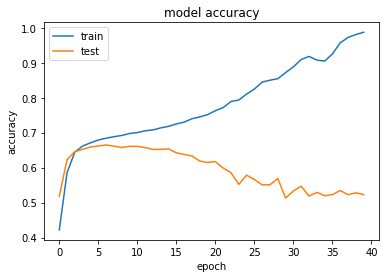

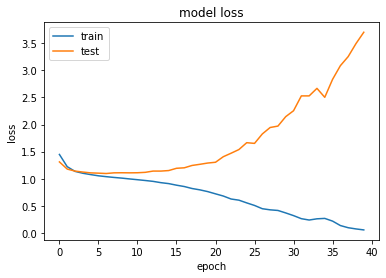

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=40,batch_size=4096)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch Size: 8192, Epochs: 45**

Epoch 1/45
17/17 [==============================] - 28s 2s/step - loss: 1.5716 - acc: 0.3389 - val_loss: 1.4101 - val_acc: 0.4420
Epoch 2/45
17/17 [==============================] - 28s 2s/step - loss: 1.3659 - acc: 0.4752 - val_loss: 1.2798 - val_acc: 0.5417
Epoch 3/45
17/17 [==============================] - 27s 2s/step - loss: 1.2408 - acc: 0.5718 - val_loss: 1.1905 - val_acc: 0.6135
Epoch 4/45
17/17 [==============================] - 28s 2s/step - loss: 1.1588 - acc: 0.6309 - val_loss: 1.1557 - val_acc: 0.6356
Epoch 5/45
17/17 [==============================] - 28s 2s/step - loss: 1.1235 - acc: 0.6508 - val_loss: 1.1438 - val_acc: 0.6418
Epoch 6/45
17/17 [==============================] - 28s 2s/step - loss: 1.1036 - acc: 0.6601 - val_loss: 1.1270 - val_acc: 0.6524
Epoch 7/45
17/17 [==============================] - 28s 2s/step - loss: 1.0808 - acc: 0.6713 - val_loss: 1.1182 - val_acc: 0.6550
Epoch 8/45
17/17 [==============================] - 28s 2s/step - loss: 1.0656 - acc: 0.67

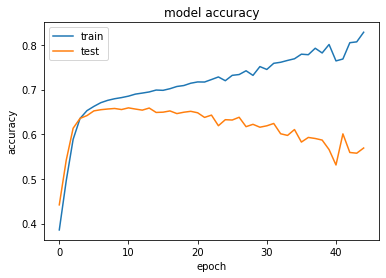

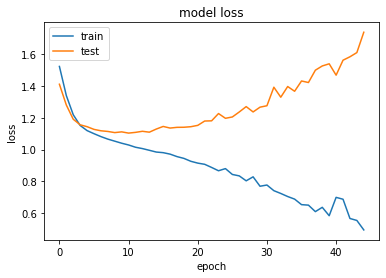

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=45,batch_size=8192)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The best batch size for the model is 128, and 3 epochs, determined by the the loss, val_acc, val_loss and loss recorded in my Google Sheets. It has the best 
accuracy of the training and test set, as well as the last loss compared to the other batch sizes and epochs tested. 

[The maths to determine the best batch size is in the second sheet of my Google Sheet. It is publicly available. ](https://docs.google.com/spreadsheets/d/1mKmxhN-QYXAiXuvJAhLo-uXzX8x79KeGLtaYGU-mBOM/edit?usp=sharing)

# **Selected batch size and epoch**

**Batch Size: 128, Epochs: 3** Chosen because it was the best performing from the batch size investigation.

Epoch 1/3
1047/1047 [==============================] - 42s 40ms/step - loss: 1.2911 - acc: 0.5275 - val_loss: 1.0980 - val_acc: 0.6612
Epoch 2/3
1047/1047 [==============================] - 41s 40ms/step - loss: 1.0774 - acc: 0.6712 - val_loss: 1.0812 - val_acc: 0.6745
Epoch 3/3
1047/1047 [==============================] - 42s 40ms/step - loss: 1.0439 - acc: 0.6860 - val_loss: 1.0728 - val_acc: 0.6764


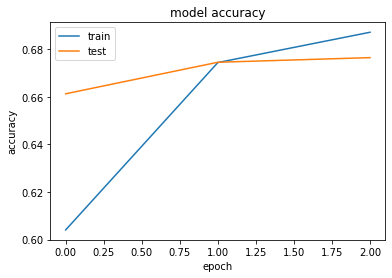

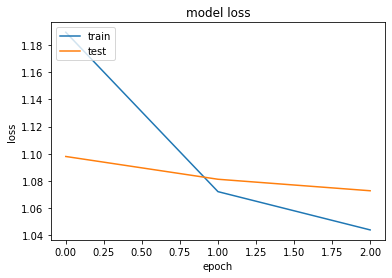

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3,batch_size=128)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Batch size: 32, Epochs: 3** The original model settings.

Epoch 1/3
4188/4188 [==============================] - 116s 28ms/step - loss: 1.2671 - acc: 0.5490 - val_loss: 1.0958 - val_acc: 0.6644
Epoch 2/3
4188/4188 [==============================] - 113s 27ms/step - loss: 1.0735 - acc: 0.6734 - val_loss: 1.0801 - val_acc: 0.6739
Epoch 3/3
4188/4188 [==============================] - 119s 28ms/step - loss: 1.0498 - acc: 0.6847 - val_loss: 1.0708 - val_acc: 0.6751


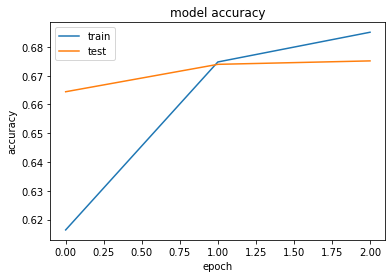

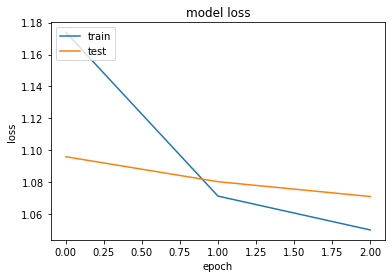

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Despite all the changing in batch sizes, 32 batch sizes, the default, is still the best for this model.

Epoch 1/3
4188/4188 [==============================] - 102s 24ms/step - loss: 1.2680 - acc: 0.5490 - val_loss: 1.0966 - val_acc: 0.6638
Epoch 2/3
4188/4188 [==============================] - 101s 24ms/step - loss: 1.0726 - acc: 0.6736 - val_loss: 1.0767 - val_acc: 0.6745
Epoch 3/3
4188/4188 [==============================] - 103s 25ms/step - loss: 1.0470 - acc: 0.6853 - val_loss: 1.0674 - val_acc: 0.6774


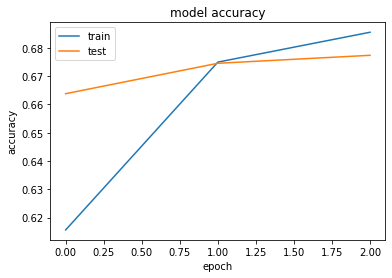

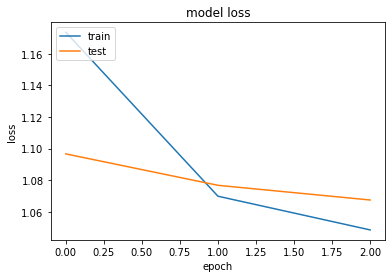

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Optimisers**

***SGD***

Epoch 1/3
4188/4188 [==============================] - 100s 24ms/step - loss: 1.6088 - acc: 0.2269 - val_loss: 1.6079 - val_acc: 0.2948
Epoch 2/3
4188/4188 [==============================] - 99s 24ms/step - loss: 1.6077 - acc: 0.2684 - val_loss: 1.6073 - val_acc: 0.3246
Epoch 3/3
4188/4188 [==============================] - 99s 24ms/step - loss: 1.6072 - acc: 0.3245 - val_loss: 1.6070 - val_acc: 0.3264


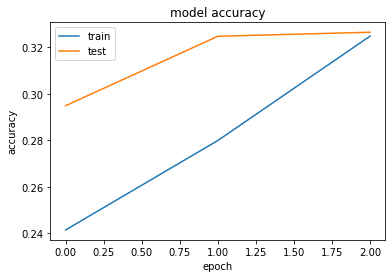

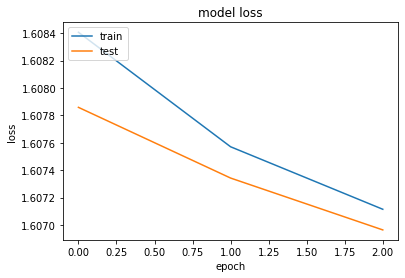

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))


# Compile model
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***ADAGRAD***

Epoch 1/3
4188/4188 [==============================] - 105s 25ms/step - loss: 1.6093 - acc: 0.2073 - val_loss: 1.6091 - val_acc: 0.2430
Epoch 2/3
4188/4188 [==============================] - 103s 25ms/step - loss: 1.6089 - acc: 0.2468 - val_loss: 1.6086 - val_acc: 0.2776
Epoch 3/3
4188/4188 [==============================] - 103s 25ms/step - loss: 1.6085 - acc: 0.2825 - val_loss: 1.6080 - val_acc: 0.2968


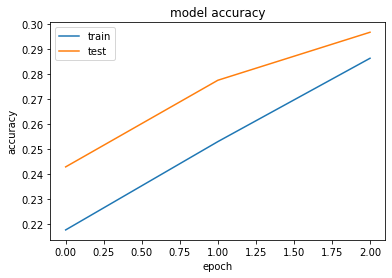

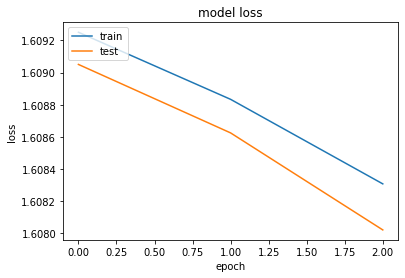

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adagrad", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***RMSPROP***

Epoch 1/3
4188/4188 [==============================] - 128s 30ms/step - loss: 1.2768 - acc: 0.5440 - val_loss: 1.1091 - val_acc: 0.6564
Epoch 2/3
4188/4188 [==============================] - 127s 30ms/step - loss: 1.0898 - acc: 0.6673 - val_loss: 1.0864 - val_acc: 0.6692
Epoch 3/3
4188/4188 [==============================] - 128s 31ms/step - loss: 1.0677 - acc: 0.6779 - val_loss: 1.0896 - val_acc: 0.6690


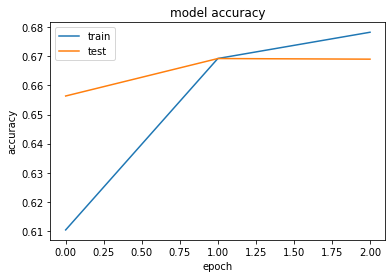

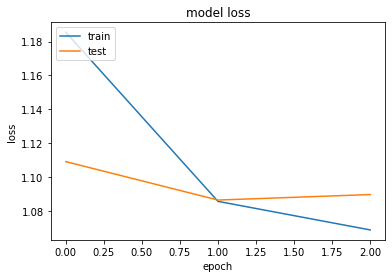

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***ADAM***

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer"adam", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grid Search

We must run a Grid Search on an Microsoft Azure Data Science VM to determine the best set of hyperparameters to use with our model. This is a brute-force method, as it tries every combination of hyperparameters you give it. We were required to have at least three optimizers and weight initialisers. Epoch and batch size were determined due to prior exploration as seen above. 

This will produce a combination with the best accuracy and least loss.

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', init='uniform'):
    # create model
  model = Sequential()
  model.add(Dense(1600, input_dim=81, kernel_initializer=init, activation='relu'))
  model.add(Dense(1000 ,kernel_initializer=init, activation='relu'))
  model.add(Dense(200 ,kernel_initializer=init, activation='relu'))
  model.add(Dense(200 ,kernel_initializer=init, activation='relu'))
  model.add(Dense(5, kernel_initializer=init, activation='softmax'))
    # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# grid search epochs, batch size and optimizer
optimizers = ['adam', 'rmsprop', 'adagrad']
inits = ['uniform', 'normal']
epochs = [3, 5, 8, 11]
batches = [32, 64, 128, 256]

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, encoded_y, verbose=1)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/3
5000/5000 [==============================] - 33s 7ms/step - loss: 1.1608 - accuracy: 0.6244
Epoch 2/3
5000/5000 [==============================] - 32s 6ms/step - loss: 1.0674 - accuracy: 0.6774
Epoch 3/3
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0583 - accuracy: 0.6812
Epoch 1/3
5000/5000 [==============================] - 32s 6ms/step - loss: 1.1632 - accuracy: 0.6230
Epoch 2/3
5000/5000 [==============================] - 32s 6ms/step - loss: 1.0687 - accuracy: 0.6767
Epoch 3/3
1250/1250 [==============================] - 2s 1ms/step - loss: 1.0582 - accuracy: 0.6819
Epoch 1/3
5000/5000 [==============================] - 33s 7ms/step - loss: 1.1629 - accuracy: 0.6226
Epoch 2/3
5000/5000 [==============================] - 35s 7ms/step - loss: 1.0674 - accuracy: 0.6773
Epoch 3/3
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0674 - accuracy: 0.6786
Epoch 1/3
5000/5000 [==============================] - 35s 7ms/step - loss: 1.1605 - 

Best: 0.681453 using {'batch_size': 256, 'epochs': 3, 'init': 'uniform', 'optimizer': 'adam'}

We have found our best model according to the Grid Search, and unsurprisingly, it is one with little epochs due to the high capacity of the network. This took a day to run due to the high capacity!

Epoch 1/3
524/524 [==============================] - 42s 79ms/step - loss: 1.3160 - acc: 0.5072 - val_loss: 1.1100 - val_acc: 0.6552
Epoch 2/3
524/524 [==============================] - 41s 78ms/step - loss: 1.0844 - acc: 0.6681 - val_loss: 1.0751 - val_acc: 0.6749
Epoch 3/3
524/524 [==============================] - 41s 78ms/step - loss: 1.0454 - acc: 0.6846 - val_loss: 1.0721 - val_acc: 0.6784


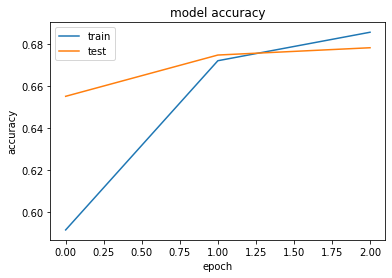

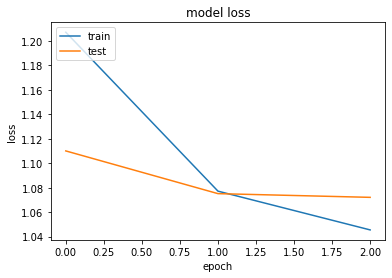

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see, this is actually really quite good. There is little difference between the loss of the two sets, despite it being high due to the artificial errors put in place due to the generation of the dataset. What's important is the difference between the two. 

# **Final Model Presentation and Performance Evaluation**

Our best performing model is the one determined from the grid search, which took hours upon hours to run. We need to now put it in production, and serialize it into JSON as well as save our weights into the HDF5 file format. However, before we do that, we need to apply regularization techniques. 

Now, we have already used a regularization technique in 'early stopping', when our model began to overfit beyond a certain point of epochs. I'm not sure if utilising it early is bad practice, but considering people use Dropout, another regularization technique to help the model generalize to new data points from the beginning of their model exploration sometimes, I will assume it is not bad practice to use early dropping, well, early. 

However, there are other regularization techniques besides early stopping we can use. I will try to use Dropout to enhance the performance of my model. We have already used early stopping to great success, will Dropout help us in improving the generalization of our model?

Epoch 1/3
524/524 [==============================] - 43s 82ms/step - loss: 1.3252 - acc: 0.4997 - val_loss: 1.1147 - val_acc: 0.6519
Epoch 2/3
524/524 [==============================] - 43s 81ms/step - loss: 1.0951 - acc: 0.6622 - val_loss: 1.0759 - val_acc: 0.6737
Epoch 3/3
524/524 [==============================] - 43s 82ms/step - loss: 1.0558 - acc: 0.6801 - val_loss: 1.0739 - val_acc: 0.6774


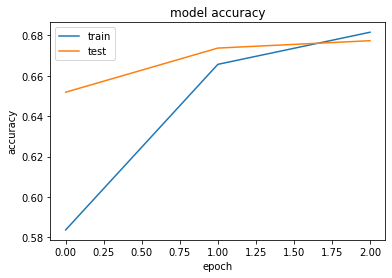

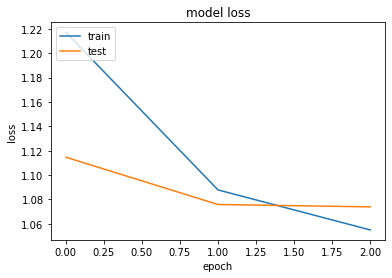

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=3,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The use of dropout, no matter where the placement in the layers seems to harm the performance overall of the model. I wonder if it would be a good idea to exclude it as a result. https://stats.stackexchange.com/questions/299292/dropout-makes-performance-worse/299305

This Stack Exchange post refers to a lack of training time may hurt the usage of Dropout in the model:

>When training time is limited. It's unclear if this is the case here, but if you don't train until convergence, dropout may give worse results. Usually dropout hurts performance at the start of training, but results in the final ''converged'' error being lower. Therefore, if you don't plan to train until convergence, you may not want to use dropout.

**Let's try to add an epoch to see if it makes a difference.**

Epoch 1/4
524/524 [==============================] - 43s 82ms/step - loss: 1.3236 - acc: 0.5009 - val_loss: 1.1196 - val_acc: 0.6505
Epoch 2/4
524/524 [==============================] - 43s 81ms/step - loss: 1.0963 - acc: 0.6607 - val_loss: 1.0802 - val_acc: 0.6710
Epoch 3/4
524/524 [==============================] - 43s 81ms/step - loss: 1.0568 - acc: 0.6794 - val_loss: 1.0709 - val_acc: 0.6779
Epoch 4/4
524/524 [==============================] - 43s 81ms/step - loss: 1.0333 - acc: 0.6906 - val_loss: 1.0681 - val_acc: 0.6792


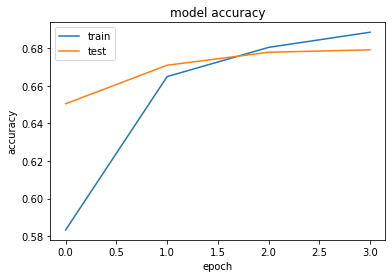

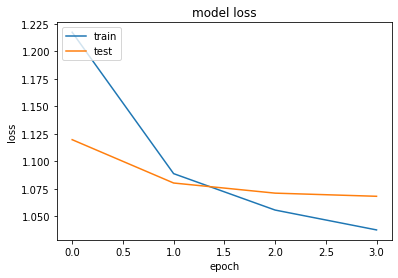

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=4,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

It does make a difference, with an accuracy of 0.6906 with dropout and extra epoch vs 0.6846 without any dropout. However, we can observe a slight increase in disparity of loss between the training and test sets. However, for the sake of extra accuracy, this amount is minimal, so **we will make an executive decision to keep the dropout and extra epoch.**

**Final Model Performance Evaluation**

Epoch 1/4
524/524 [==============================] - 44s 83ms/step - loss: 1.3237 - acc: 0.5042 - val_loss: 1.1188 - val_acc: 0.6499
Epoch 2/4
524/524 [==============================] - 43s 82ms/step - loss: 1.0977 - acc: 0.6593 - val_loss: 1.0799 - val_acc: 0.6710
Epoch 3/4
524/524 [==============================] - 43s 82ms/step - loss: 1.0575 - acc: 0.6792 - val_loss: 1.0736 - val_acc: 0.6768
Epoch 4/4
524/524 [==============================] - 43s 83ms/step - loss: 1.0318 - acc: 0.6906 - val_loss: 1.0694 - val_acc: 0.6786


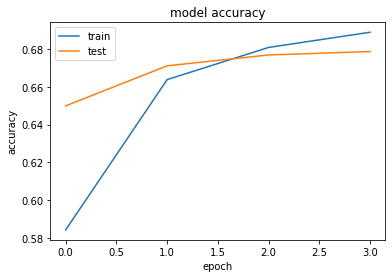

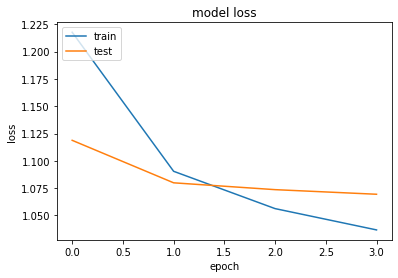

In [ ]:
# define and fit the final model
modelF = Sequential()
modelF.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
modelF.add(Dropout(0.2))
modelF.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

modelF.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
results = modelF.fit(X, encoded_y, validation_split=0.33,epochs=4,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

modelF.save_weights("Release-Weights.hdf5")

The model has the most accuracy out of what we've seen yet, so it is a prime choice for the final model to be determined. We shall now create a new dataset to make predictions on, this is necessary because we need totally unseen data to test on, not seen on the test or training data. 

**Unseen Data Generation**

In [ ]:
# fix random seed for reproducibility
np.random.seed(93)
tf.random.set_seed(93)

features = 81
classes = 5
n = 10
errors = 0.37
redundant = int(features/4)



# Classification dataset
X, y = make_classification(n_samples=n, n_classes=classes, n_features=features, \
                           random_state = 1,n_informative =20, flip_y=errors, \
                           n_redundant=redundant)

# reshape y to 2D array, it needs to be to append
y = np.reshape(y, (-1, 1))

#add y to x
Xy = np.concatenate((X,y),axis=1)

np.savetxt("MyUnSeenData.csv", Xy, delimiter=",")

print(Xy[:5])

[[-2.98541636e+00 -4.01242477e-01  4.35049884e-02 -8.06425301e+00
  -3.28299490e-01  2.15423761e+00  1.84378827e+00  2.29816247e+00
  -1.72844340e-01  4.55151686e-01 -3.73482403e-02  2.31217458e+00
  -6.31258669e+00 -3.54776898e-01 -1.45768118e+00 -6.72575205e-01
   3.29254637e-01 -3.31306698e+00 -2.46294396e-01 -6.90919574e-01
   4.68265411e-01  8.04051545e+00  6.31463232e-01 -8.48158179e-01
  -4.73275262e-02  4.69645130e-01  2.55314885e-02  2.60276010e+00
  -5.59526840e-01  9.92548459e-01 -8.01188532e-01  9.35251968e+00
  -1.20493802e+00 -5.98214794e-01  5.30831605e+00  1.64899231e+00
   1.25478427e+00 -8.72327671e+00  3.15378565e-01 -5.29285162e-01
   2.89428289e-02 -6.22953762e+00  6.29538163e+00 -1.00441853e+00
  -7.77094595e+00 -5.39266012e-01 -1.18540779e+01 -5.80469926e+00
  -5.45619311e+00 -7.69807223e-01  1.21055198e+00 -1.39903089e+00
   1.98407413e+00  4.27146638e+00 -2.17676124e+00  1.03608587e+00
   5.16500813e-02 -1.99218180e-01 -3.49630721e+00 -3.49988306e-01
   1.68635

In [ ]:
testData = np.array([[-2.985416357671438092e+00,-4.012424770129491280e-01,4.350498839483707414e-02,-8.064253009978225251e+00,-3.282994895263450785e-01,2.154237605260652000e+00,1.843788268575589528e+00,2.298162466694352979e+00,-1.728443400200121438e-01,4.551516857562931118e-01,-3.734824027498927917e-02,2.312174577897027739e+00,-6.312586685319916846e+00,-3.547768982612266586e-01,-1.457681177312048604e+00,-6.725752046194750644e-01,3.292546368901791976e-01,-3.313066977047359085e+00,-2.462943962563002298e-01,-6.909195742166460708e-01,4.682654109935149300e-01,8.040515451896908417e+00,6.314632317657078442e-01,-8.481581789012491157e-01,-4.732752622932372144e-02,4.696451303762301244e-01,2.553148854536591017e-02,2.602760099456927545e+00,-5.595268399149126992e-01,9.925484586002815135e-01,-8.011885321670761950e-01,9.352519682727304939e+00,-1.204938018385665721e+00,-5.982147937763881984e-01,5.308316053129906287e+00,1.648992308132316786e+00,1.254784270285668413e+00,-8.723276714375659324e+00,3.153785654962081852e-01,-5.292851617610430104e-01,2.894282892231972437e-02,-6.229537618978953084e+00,6.295381629862458972e+00,-1.004418526028443281e+00,-7.770945950406845881e+00,-5.392660119272599806e-01,-1.185407789170237258e+01,-5.804699256117810791e+00,-5.456193111350698288e+00,-7.698072233255276453e-01,1.210551980001451478e+00,-1.399030888924924554e+00,1.984074132650088362e+00,4.271466381575259597e+00,-2.176761244994119160e+00,1.036085867217385381e+00,5.165008131169992328e-02,-1.992181804603951334e-01,-3.496307208399348720e+00,-3.499883056415922788e-01,1.686353634275729929e+00,9.951765675076230666e-01,3.989304918538058575e-01,-1.094394171229506219e+00,-7.095547765263172657e-01,-1.296588152416295880e+00,1.246221026989545733e+00,-7.545962410540477672e-01,1.707785365258823074e+00,7.454699901550868590e-01,1.201575015619208653e+00,1.058372268981606190e+00,-3.432452593973386867e-01,1.463360009576637477e+00,1.595991656762564548e-01,-5.868958621006730603e+00,-4.310605882354018870e-01,-4.596343842967440252e-01,-1.455420346519786134e+00,-6.616798321855954512e+00,9.915394384983994058e+00],
[5.760754012897320919e+00,4.306668296024491305e+00,2.374663934277295718e-01,2.295977391484597341e+00,7.862918934933967874e-01,-1.877142187179975386e-01,1.397010060056745329e-01,-3.858565877941179778e+00,8.074939696255074573e-01,9.390806687807043973e-01,-1.124033898911461909e-01,1.304683793253727409e+00,-7.640554496986282640e-01,9.140022974948493195e-02,-4.890201072937892524e-01,3.639321447151572797e-01,-9.853830741421629735e-01,-3.417135661818840209e+00,2.681596969494350891e-01,3.438632133974825145e+00,-2.413568114270807197e+00,4.907114006092097469e+00,-7.622249379410465063e-03,2.465194608863366943e-01,-7.443266299336349645e-01,-8.426038897107034353e-01,-1.550542936000105509e+00,-2.218136742858014543e+00,8.123368829104893329e-01,-3.378083793850470418e+00,6.424615235192521201e-01,1.754518969467263156e+00,-1.090607024847733086e+00,-4.179369905977352306e-02,4.115624322094999649e-02,-1.481979412324951895e+00,5.552884662443501040e-02,3.996494844327448615e+00,-6.207444344359481780e-01,-2.839725079798061991e+00,-1.471964694066517643e+00,1.506106426989897829e+00,9.621339581145263997e-01,9.881617888475106026e-01,3.905811924624775777e+00,6.833345347782964208e-01,3.008987933284413163e+00,2.240273482243638536e+00,1.147350734231159963e+00,8.897890624052434694e-01,2.791396522045436895e-02,-4.221504206503698065e+00,6.849393702796801042e-01,4.153652201180122461e-01,3.083895935782620334e+00,2.006628144561350080e+00,1.935510301180463300e+00,-1.231704726633345570e-01,3.337499904759469338e+00,1.503200435581389049e+00,-5.699971932923106888e-01,-2.963786752007175340e-01,-6.918888709443663521e-01,-8.365669056352954547e-01,-7.668206563310357993e-01,2.652278929682597042e+00,-5.597308791060695565e-01,3.713784101246172531e-01,-3.980914252991265556e-01,-5.698870000382182388e-01,1.387652012756414137e-02,-1.387113959395988250e+00,7.662133664401396538e-02,7.052355601766979731e-01,-1.492703745848704910e+00,-2.355495087501323637e-01,-5.463342013315357348e-02,-1.673864579346229009e+00,1.040803495201791051e+00,-3.065315751058558025e+00,-8.411046317779881321e+00],
[1.050026487820463572e+01,-2.379217623758863365e+00,3.528556101897828423e-01,7.962681812437227613e+00,-4.430168045941828003e-01,6.875876943313844469e-01,1.093487502754137836e-01,5.233514177682065949e+00,-7.305850578112021987e-01,8.866298459311623414e-01,-8.042861656640171164e-02,-1.827801631837707164e-01,1.402289239569707036e+01,1.227279842913046481e+00,-6.507351521387333415e-02,-7.979063831013835095e-01,-7.159251747537909161e-02,6.977220934267045038e+00,3.806043960280033334e-01,-3.019568696997298574e+00,1.310698689832733521e+00,2.636280946417685289e+00,-1.341075234499919944e+00,2.589332518802187760e-02,1.167753666322188799e+00,1.133484167291608724e+00,3.120897068749953540e+00,1.933869422240295233e-01,-1.942905920875912518e+00,-2.781336499634458725e+00,1.328001733520268735e-01,8.008025469533073704e+00,-3.100681081924015814e+00,2.095340483901188440e-03,-1.194854491071110525e+00,-2.722851251976985409e+00,7.178133684053337182e-01,-5.554445254439232649e+00,-3.990052632806517785e+00,2.606275263864195058e-01,-2.016538836607028595e-01,9.312033779937546996e+00,1.459506484352889988e+00,1.408217331593034083e-01,4.854377587035090258e+00,-1.211989928208227374e+00,-4.922693797304917851e+00,3.139295048647821051e+00,9.248752737038179461e+00,1.086378447015136084e+00,6.870380565998115419e-01,-6.727324417760700559e-01,1.018470852254898418e+00,-2.154554675122566376e-01,-5.387349938023400675e+00,-7.269286518151497622e-01,-1.082261643455897406e-02,-6.224574612252108397e-01,-2.270151541185027710e+00,4.840979698678788551e-02,-1.582781350879636229e-01,7.343142380546093584e+00,-1.124796696465733659e+00,-9.533528148030201432e-01,-1.245473236302047759e+00,-6.397845655974068180e-01,-1.142013932763954687e+00,-9.630014233429489146e-01,-4.647787085563956921e-01,-6.588434976465022685e-02,3.355961513610497549e-01,-4.394358886191839453e+00,1.107073911489380169e+00,2.400360459503049437e+00,1.332659707360353440e+00,3.233537216282749149e+00,4.983709787944293756e-01,-5.745795417285818329e-01,2.635182202432777121e+00,4.241518273589928611e+00,2.136172893398888384e+00],
[-6.415491921765733574e-01,-2.712567979055291456e-01,-4.623416190153337713e-01,9.212628941425168305e-01,-1.552216814207568740e+00,2.084513922928348251e-01,-1.293925047081115887e+00,2.107507933598785410e+00,-1.126432741412030980e+00,4.699935961513764145e-03,-1.703785049926676898e+00,-1.050224317829875798e+00,-7.623942310775095876e+00,1.753508448678423037e-01,3.683333828955280276e-01,1.320924734275046308e+00,-6.780403060118187497e-01,1.146462867326882712e-02,1.436176677723674411e+00,4.401959764480094961e+00,-4.355741714962380051e-01,4.135256963811484443e-01,-3.036252520815734823e-01,-8.321906738479518673e-01,2.610765381730812199e-02,-1.036870061266861542e+00,-3.406331062526999354e-01,-2.308022290828133372e-01,2.268319409925220853e+00,1.563129668421412211e+00,1.063536147266354259e+00,2.444733869580148600e+00,-3.118234171924679998e+00,4.559104757802749375e-01,-8.670733887174938204e+00,-1.300958632311047580e+00,1.161552096953374802e+00,-5.438946905671182996e+00,2.643546889998576788e+00,3.161771591633775635e+00,-1.412855723129405883e+00,-6.267807833376612514e+00,7.296309049370572453e+00,-1.217838671215705215e+00,2.777121856410542655e+00,5.717831500153967017e-01,-3.231767540898960789e+00,-2.400902214267036427e+00,-5.743324821976165673e+00,-4.938724500901424674e-01,1.803932950047493211e-01,2.749419111637434465e+00,1.626452525932492454e+00,3.665640182881438891e-01,-1.128760103532271408e+01,-1.718030829561559151e-03,5.843129656524639892e-02,3.020114884341724149e-01,-3.934077741688630780e+00,-1.919626136580503684e-01,-1.665440070574283116e+00,-2.372321494651063567e+00,1.946941391199768778e-01,-1.118365489319802286e+00,-1.576657939867898595e+00,-1.251009261468650768e+00,1.578095129679257136e+00,-6.303167179427487943e-01,-2.052507009369989532e+00,1.295956536200149944e+00,2.792683590841139596e-01,1.358385939894191097e-01,-5.528702478849655266e-01,1.996706455805361768e+00,-1.403572486866725422e+00,8.371815629337806541e-01,1.730491527005957986e+00,-1.219226364707353794e+00,-3.958237759863589833e+00,1.460310939558167487e+00,-3.097085887418787209e+00],
[3.367404302886161105e+00,4.348467241455558963e+00,-6.220402717488450195e-01,-1.603269692068834518e+00,-1.429457066934292753e+00,-3.990954971665289924e-02,3.615725010882979151e-01,1.107697256588936696e+00,-5.655824605382080428e-01,1.689152672494124374e+00,-1.044125827866027034e-02,-5.678691222232413738e-01,-4.165150447765372910e+00,-5.895011638865148562e-01,9.781187573165862625e-01,1.866949141490745756e-01,9.496600455258216167e-01,-7.256845084565285653e+00,1.015553043263723643e+00,-3.612293064486791216e-01,-1.618453730541940416e+00,1.889184449881577521e+00,2.933294672243462187e-01,-1.236135162967397338e+00,5.736466856995304786e-01,-1.818958714360024986e+00,2.796758696883574924e+00,-1.102899655010896485e+00,-3.409352279724905177e+00,-2.767319855354995362e+00,-2.186815908106751749e+00,1.410136385206787324e+01,3.832785134482224798e+00,4.534360811813268333e-01,1.065169808873551105e+01,-1.302476152344278493e-01,2.941597839913615564e-01,9.838507269897020180e+00,6.626042575162957249e+00,1.507946847274192592e+00,-1.319879269903766916e+00,7.889166333362089389e+00,-5.909678968362044316e+00,2.056731254261348063e+00,7.561531613850458022e+00,-1.079986789809565639e+00,5.999961507590484189e+00,2.608233090671975951e+00,6.247522044283956966e+00,3.028021507491707176e-01,-8.032988229912794154e-01,-1.477861228735099619e+00,6.982536005565727066e-01,1.560985471217621878e+00,3.517652056176776121e+00,6.681441107170537075e-01,1.444676067969658639e+00,1.135507396653411549e-01,7.678587244363344055e-01,-1.213504869194142577e+00,4.353788547738699499e-01,-1.202470120401148357e+01,5.814071798057131035e-01,-3.719710033329185483e-01,-4.075300638440280565e+00,-2.387808761728598572e+00,-4.546826878704784969e-02,2.071347881650793088e+00,1.883505693018204141e+00,-6.947821766785136077e-01,-1.833180488085587312e+00,-2.118782627576543121e+00,-1.613372729357742119e-01,-1.200579237095558582e+00,-1.559718407007905761e+00,-2.279233276779238260e+00,-8.506543208206648332e-01,5.909457311277808156e-01,-1.584158817722049362e+00,-5.345526612542066403e+00,1.032281179847173824e+01],
[-6.279519890486629841e+00,2.984678627241894588e-01,3.266678355449931792e-01,6.615433388664579084e+00,3.007970337952594053e-01,-4.495284070162376411e-01,1.413117739585306731e+00,2.631282645441882284e+00,9.920605530150810036e-01,6.238330988262129617e-01,-1.280818082630427214e-03,1.421046723123809696e-01,1.953774323070395225e+00,2.259120022339508940e-02,2.219756134237049205e-01,-4.600104967055327898e-01,-1.297875615471797195e+00,3.175963371624081155e+00,1.521229766962174157e+00,-1.495420702981965722e+00,1.582504312816721770e+00,-8.722252573877171677e-01,7.287758921241658250e-01,1.034833366103765639e+00,-6.876738372050350545e-01,1.338145136558061887e+00,1.297263428761574300e+00,-1.035367618998367600e+00,-3.166492217353618077e-01,2.410706495968426122e+00,8.202567997945232614e-01,-1.333339011945088748e+00,2.803614808851480067e-01,3.934369595035402400e-01,2.522152051219795688e+00,7.926605905243919725e-01,2.930083212386504155e+00,-2.617220009027022010e-01,1.589581684395886541e+00,1.230920391580736073e+00,-1.203347656286334576e-02,-1.591720246643377967e+00,1.003521328827616621e+01,1.288572511672076759e+00,3.245430312967507280e+00,-2.740350941144933383e-01,-3.887556813442970549e-01,4.953431405443965652e+00,7.223405762117097950e+00,3.301681809679333224e-01,7.950048994170415551e-01,-5.235982271440222657e-01,-8.336655811197551946e-01,1.671000291387305214e+00,1.156311646341782184e+00,8.048843169664202657e-01,4.072125362902245110e-02,1.230312245091659484e+00,2.330463968709258538e+00,-2.145841812691291206e-01,-2.615493251534693364e+00,-3.647776079740394639e+00,1.033702342466308544e+00,-3.617810222281976906e-01,6.729992073158377330e-01,9.908944161189933708e-02,-5.311009760544345149e-01,-4.109118838047800537e-01,1.601913212060251501e+00,1.039437992856676596e+00,2.106722686651326892e+00,-2.295357121985072357e+00,6.799861411587336812e-01,2.008205831526900909e+00,8.641140849502451093e-01,-4.211430628238119755e-01,-5.924669645774740534e-01,6.170541625063776653e-02,2.641120400256040224e+00,2.949085285826444469e+00,7.155945737293210485e+00],
[7.358096407040514819e+00,-1.406547311864178251e+00,-1.019720048404296087e+00,-1.248811640286220204e+01,1.121574063412345446e+00,4.528695546709248787e-01,1.634358485664579863e+00,-3.774731198290155021e+00,1.021028761672571950e+00,1.905852107505038973e+00,-7.528371845419303821e-01,-1.064437375681123621e+00,-7.225958897424630933e+00,4.021722715859418762e-01,1.701796671574662412e+00,-3.878879894667282974e-02,3.749580892395692477e-01,-2.985216779915957019e+00,3.312981449876042928e-01,-1.210090801926893445e+00,3.029632899952883207e-01,6.405451913619161886e+00,7.034482370778747384e-01,2.683901565560963820e-01,6.812369647790720295e-01,9.616998547689277199e-01,1.306197463990186325e-01,3.379202890547928106e+00,7.861111327179926000e-01,-3.606983847510178975e-01,7.891898226405603956e-02,2.954220288882780210e+00,2.534713078940093123e+00,-1.162333987284100312e+00,7.775930435749954128e+00,-3.936897542869993494e+00,1.625898464451382697e-01,-5.302299276557316254e+00,-5.717668406705094242e-01,1.864841140255953267e+00,-2.675767174402450821e-01,-2.037182711308128447e+00,1.569774307974232785e+00,-5.882569969035251756e-01,-4.663357616321308630e-01,2.775070459022593861e-01,-5.055413539047176386e+00,-2.825169537511686979e+00,-6.646245819859275095e+00,7.639147277022015903e-01,1.931398733532420753e+00,6.238157950077527492e-01,-1.719943867578976215e+00,2.836055557313241771e+00,-4.639558377419424673e+00,-3.060639959868370341e-01,-2.224743043400328801e+00,5.949761627368765904e-01,-1.911040808062054897e+00,5.563078561562034841e-02,4.058759127700994895e+00,5.151326336733881739e+00,-1.331991819377565278e+00,1.773036872872523873e+00,-4.011857107217191576e+00,8.272080744008796227e-01,-1.441148420844021727e+00,5.066306767822029711e-01,-1.072251794409545766e+00,-3.160693813164583421e-01,-1.949810689215709214e+00,-7.360207607019737530e-01,1.089142266218482424e+00,-3.433559079267027414e+00,-1.747202102247095157e-01,-4.200106455828734653e+00,3.379239933097898385e-01,-2.630553203217758096e-01,-3.067300594473210129e-02,-6.213851312244708325e+00,9.563813998792319637e+00],
[-3.611219394266497407e+00,-3.444875914010243179e+00,2.469779193615914692e-01,1.188551820617146859e+01,-3.404142699188507093e-01,7.825091696591285340e-02,6.101147912779490978e-01,-7.158308880616627512e+00,5.941174632459419458e-01,-1.192212902668710495e+00,-1.107620460034509403e-02,4.856815909893212879e-01,6.418761986086766846e+00,3.336926862664608140e-01,1.049341755444827440e+00,-1.316679704315916855e+00,-1.683941541056688473e+00,-9.280812687528841920e+00,5.487521940160408063e-01,3.823951287463711601e-01,-6.009831398994478491e+00,-1.320915988872922497e+00,4.765987240833631788e-01,1.275966877795021992e-01,-4.380951616989381403e-01,-3.755812669314532171e-01,3.397320027823374833e+00,-3.829591084071226170e+00,-1.517362228070597396e+00,-3.524227697354635591e+00,6.294120903700577419e-01,-1.163179002205287027e+01,4.086723402684263595e-01,-2.472149545065386866e-01,4.184036730970914775e+00,1.549394180113072839e-01,8.802110189694060116e-01,1.372207115283297618e+01,-4.426869772449466001e-01,4.223957180937905065e-01,-1.017311422818940603e+00,1.681463088341425216e+00,-5.021872456382365790e+00,1.891705188611696176e-01,1.035224961189146597e+01,-1.941985153668302821e+00,6.764738477301384556e+00,1.305765614099194671e-01,1.235111451675840399e+01,-3.343178874886175711e-01,-1.088870275390664943e+00,3.715778604620537884e+00,4.149065283796035675e-01,1.079852810983268352e+00,-4.560188587881073730e+00,8.606325503135665578e-01,1.752312456466462720e+00,1.176208061409850236e+00,3.199525908973977817e+00,-2.834400642575207296e+00,-3.468397354196186111e+00,-6.467953993658970280e-01,-3.865542197384919665e-01,-6.155852250344889809e-01,1.396262036836168452e+00,8.050879973020380609e-01,-1.034029260880297896e+00,7.710008128414419515e-01,1.440192312917337070e+00,-3.477340520776726618e-01,-1.244446869198632954e-01,1.035155490751562546e+00,1.139412156147674438e+00,4.176499028477998365e+00,8.676390027296279062e-01,3.346233807002526817e+00,-1.450006570700336672e+00,-7.951725666313227969e-02,2.309399108211589891e+00,5.312490112735106962e+00,-1.709192307559391111e+01],
[-9.665959517060624950e-01,-4.140960158291108861e+00,2.565643279949862965e-01,-4.186482507341334980e+00,9.904661803414933907e-02,1.075179500445744729e+00,1.432810145963814730e+00,1.487715068872580915e+01,-9.051001690350845008e-01,2.400857397430970069e-02,5.614771311209921789e-01,-2.722476474474396224e-01,8.968310659799857421e-01,3.852861380157715510e-01,3.860310927403783066e-02,7.580731899185761957e-01,5.064604960492889996e-01,1.325217236189108760e+01,8.686357880964894473e-01,3.232520737642527564e+00,6.862075519893300335e-01,1.937066393314700008e+01,-2.748096267946008586e-01,-1.508076893876228786e+00,3.414367033547154873e-01,6.876007435946345225e-01,7.991076459814398625e+00,-1.141396976531523499e-01,3.702617114471580706e+00,5.520595953793821842e+00,7.084340708498865213e-01,-3.157657762946026292e+00,1.895347628489014724e-01,-9.128972367857814962e-01,1.221912764127726270e+01,3.461666708911566914e+00,-1.909360479041678493e-01,8.071296053949774674e+00,1.104304421245283052e+01,-4.355420894568514889e+00,4.628718942494904065e-02,-8.915423911286913139e+00,8.304443022778967176e+00,1.480063037162940021e-01,-1.635151998361390113e+01,3.838243428641085475e-01,-1.534477231043476664e+01,-3.814128357716381146e+00,-1.054047840475901054e+01,9.151271204830440098e-01,-1.049526009818735339e+00,-4.573740248217847970e-01,-2.967290703920111294e-01,5.318281502560251894e+00,-6.210347446281567763e+00,-8.603367504157015677e-01,-2.853478030013680389e+00,-8.378892359585571326e-01,-1.472877328187951473e-01,1.587586936516102720e-01,-1.810356160022110750e+00,-3.368130039138780507e+00,-8.686692139073252106e-01,-4.806157967923737617e-01,3.113385826658632283e+00,-1.135451147960860219e+00,-2.326530939087446015e+00,1.526626312053527945e+00,-1.978604213756854691e+00,-1.814308677172372208e+00,2.262875395459054140e+00,2.159928334197978472e+00,8.129021217512714115e-01,-5.476627149202421663e+00,-6.717906110362008576e-01,-1.402505739045482702e+00,9.613868525370181661e-01,3.500053778387274966e-02,-5.530896884420524184e-01,2.319570866900234396e+00,-1.946294647458461213e+01],
[4.152582253773534404e+00,5.541457073445649861e+00,-5.863145590215056435e-01,5.992750792817552963e+00,1.277382291569305162e+00,-8.720932216779221369e-01,5.366531847456252891e-01,2.797361481268594741e+00,-1.093667351389150832e+00,2.106032953212626790e-01,1.173216877381775936e+00,1.581832180260145160e+00,3.405063845064361661e-01,6.419554889332711456e-01,2.936216160917669016e-01,5.158595431683424826e-01,1.848176893203589966e-01,-5.743874746279010957e+00,-3.072506317303939638e-01,-2.863036188951371575e+00,-3.087696392585796534e+00,-1.139619768818152323e+01,2.379663614699825125e+00,1.173672087898597782e+00,7.101426177549771124e-01,-7.472727983324122247e-01,2.612901840679151100e+00,-4.291598614947710999e+00,-1.638370602938073795e+00,-1.202092229323288297e+00,-1.581000568577286547e+00,3.920329436730711770e+00,2.713882542121315300e-01,1.444055549652848880e+00,1.432763427371264386e+00,5.102442562994371489e-01,5.697866315807943449e-01,1.272437612335974144e+01,1.796590115907254059e+01,5.471159344997549745e+00,7.541369683243064059e-02,3.478089376140551803e+00,-1.616497922293291367e+01,-4.000053865132360831e-01,1.624565204140312247e+01,1.539693062115862876e+00,1.316765402413070341e+01,-1.644010532570259997e+01,9.750900232749266650e+00,-2.685592482563316508e-01,-1.235814982983165944e+00,4.351306074617692587e+00,-1.010842870493512402e+00,-3.201213314157948631e+00,7.786295655792891068e+00,1.559983801926228653e+00,1.602677603153122299e-01,1.693065674378285923e+00,-3.420453493210956708e+00,-1.559076493814998132e+00,-2.328398897462827577e+00,-7.430378337472516748e+00,-3.107342093563513208e-01,6.644702393172540189e-01,1.197974834692656199e+00,4.220790079043734155e-01,3.529436985870675336e-01,9.398179904707554266e-02,-2.050120806133185702e+00,5.184181204735690551e-01,-7.716509742284924922e-01,3.636461515298829550e+00,-1.925685006751600037e+00,-3.143613155907404977e+00,-1.678205857643203291e+00,-1.614143382140869054e-01,-5.655340609112921024e-01,6.753330739338895272e-01,2.554346790676083501e+00,6.876754653017621344e+00,2.964327438309982021e+00]
], dtype=float)


#Normalize data
testDataN = testData / testData.max(axis=0) #Necessary because we have normalized our data for training, we also need to normalize unseen data too.

prediction = modelF.predict_classes(testDataN)

print("Prediction 1, expected value is 2: ", prediction[0])
print("Prediction 2, expected value is 4: ", prediction[1])
print("Prediction 3, expected value is 3: ", prediction[2])
print("Prediction 4, expected value is 4: ", prediction[3])
print("Prediction 5, expected value is 1: ", prediction[4])
print("Prediction 6, expected value is 3: ", prediction[5])
print("Prediction 7, expected value is 2: ", prediction[6])
print("Prediction 8, expected value is 1: ", prediction[7])
print("Prediction 9, expected value is 2: ", prediction[8])
print("Prediction 10, expected value is 2: ", prediction[9])

Prediction 1, expected value is 2:  3
Prediction 2, expected value is 4:  1
Prediction 3, expected value is 3:  2
Prediction 4, expected value is 4:  2
Prediction 5, expected value is 1:  1
Prediction 6, expected value is 3:  1
Prediction 7, expected value is 2:  3
Prediction 8, expected value is 1:  1
Prediction 9, expected value is 2:  2
Prediction 10, expected value is 2:  0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**3 predictions out of 10 were correct. This is poor, but it's not the worst. I anticipate due to the high amount of loss in the dataset that this is to be expected. But still, it's not the worst. In terms of determining the performance of the model, it is decent. We have gotten the furthest we could without overfitting, so I would consider this a job well done.**

# Saving model and weights

We are going to save the model's weights and structure to the local filesystem. Why do we do this? Well, deep learning models usually take a long time to train. Our model isn't particularly taxing in comparison to a lot of models out there, but it's still important to know how to save a model's state to a file system and load it back up again. 

We'll use the HDF5 file format to save the weights of the neural network, and YAML to save the structure of the network.

Epoch 1/4
524/524 [==============================] - 44s 84ms/step - loss: 1.3236 - acc: 0.5046 - val_loss: 1.1148 - val_acc: 0.6532
Epoch 2/4
524/524 [==============================] - 44s 84ms/step - loss: 1.0957 - acc: 0.6610 - val_loss: 1.0760 - val_acc: 0.6739
Epoch 3/4
524/524 [==============================] - 44s 84ms/step - loss: 1.0556 - acc: 0.6799 - val_loss: 1.0721 - val_acc: 0.6790
Epoch 4/4
524/524 [==============================] - 44s 84ms/step - loss: 1.0318 - acc: 0.6905 - val_loss: 1.0679 - val_acc: 0.6787


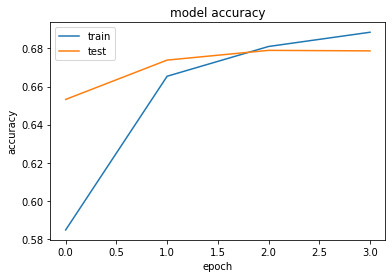

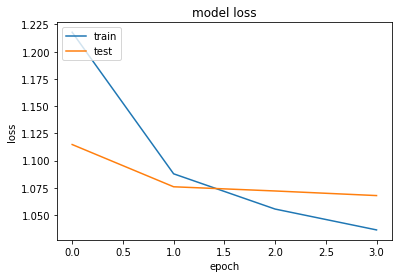

Saved model and structure


In [ ]:
# define and fit the final model
modelF = Sequential()
modelF.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
modelF.add(Dropout(0.2))
modelF.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
modelF.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

modelF.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
results = modelF.fit(X, encoded_y, validation_split=0.33,epochs=4,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# serialize model to YAML
model_yaml = modelF.to_yaml()
with open("Production_Model_YAML.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
# serialize weights to HDF5
modelF.save_weights("Production_Model_Weights.HDF5")
print("Saved model and structure")

# Opening model and weights and running model on new unseen data instance

In [ ]:
yaml_file = open('Production_Model_YAML.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()

modelP = model_from_yaml(loaded_model_yaml)

# load weights into new model
modelP.load_weights("Production_Model_Weights.HDF5")
print("Loaded model and weights from disk")

testDataP = np.array([[-2.985416357671438092e+00,-4.012424770129491280e-01,4.350498839483707414e-02,-8.064253009978225251e+00,-3.282994895263450785e-01,2.154237605260652000e+00,1.843788268575589528e+00,2.298162466694352979e+00,-1.728443400200121438e-01,4.551516857562931118e-01,-3.734824027498927917e-02,2.312174577897027739e+00,-6.312586685319916846e+00,-3.547768982612266586e-01,-1.457681177312048604e+00,-6.725752046194750644e-01,3.292546368901791976e-01,-3.313066977047359085e+00,-2.462943962563002298e-01,-6.909195742166460708e-01,4.682654109935149300e-01,8.040515451896908417e+00,6.314632317657078442e-01,-8.481581789012491157e-01,-4.732752622932372144e-02,4.696451303762301244e-01,2.553148854536591017e-02,2.602760099456927545e+00,-5.595268399149126992e-01,9.925484586002815135e-01,-8.011885321670761950e-01,9.352519682727304939e+00,-1.204938018385665721e+00,-5.982147937763881984e-01,5.308316053129906287e+00,1.648992308132316786e+00,1.254784270285668413e+00,-8.723276714375659324e+00,3.153785654962081852e-01,-5.292851617610430104e-01,2.894282892231972437e-02,-6.229537618978953084e+00,6.295381629862458972e+00,-1.004418526028443281e+00,-7.770945950406845881e+00,-5.392660119272599806e-01,-1.185407789170237258e+01,-5.804699256117810791e+00,-5.456193111350698288e+00,-7.698072233255276453e-01,1.210551980001451478e+00,-1.399030888924924554e+00,1.984074132650088362e+00,4.271466381575259597e+00,-2.176761244994119160e+00,1.036085867217385381e+00,5.165008131169992328e-02,-1.992181804603951334e-01,-3.496307208399348720e+00,-3.499883056415922788e-01,1.686353634275729929e+00,9.951765675076230666e-01,3.989304918538058575e-01,-1.094394171229506219e+00,-7.095547765263172657e-01,-1.296588152416295880e+00,1.246221026989545733e+00,-7.545962410540477672e-01,1.707785365258823074e+00,7.454699901550868590e-01,1.201575015619208653e+00,1.058372268981606190e+00,-3.432452593973386867e-01,1.463360009576637477e+00,1.595991656762564548e-01,-5.868958621006730603e+00,-4.310605882354018870e-01,-4.596343842967440252e-01,-1.455420346519786134e+00,-6.616798321855954512e+00,9.915394384983994058e+00],
[5.760754012897320919e+00,4.306668296024491305e+00,2.374663934277295718e-01,2.295977391484597341e+00,7.862918934933967874e-01,-1.877142187179975386e-01,1.397010060056745329e-01,-3.858565877941179778e+00,8.074939696255074573e-01,9.390806687807043973e-01,-1.124033898911461909e-01,1.304683793253727409e+00,-7.640554496986282640e-01,9.140022974948493195e-02,-4.890201072937892524e-01,3.639321447151572797e-01,-9.853830741421629735e-01,-3.417135661818840209e+00,2.681596969494350891e-01,3.438632133974825145e+00,-2.413568114270807197e+00,4.907114006092097469e+00,-7.622249379410465063e-03,2.465194608863366943e-01,-7.443266299336349645e-01,-8.426038897107034353e-01,-1.550542936000105509e+00,-2.218136742858014543e+00,8.123368829104893329e-01,-3.378083793850470418e+00,6.424615235192521201e-01,1.754518969467263156e+00,-1.090607024847733086e+00,-4.179369905977352306e-02,4.115624322094999649e-02,-1.481979412324951895e+00,5.552884662443501040e-02,3.996494844327448615e+00,-6.207444344359481780e-01,-2.839725079798061991e+00,-1.471964694066517643e+00,1.506106426989897829e+00,9.621339581145263997e-01,9.881617888475106026e-01,3.905811924624775777e+00,6.833345347782964208e-01,3.008987933284413163e+00,2.240273482243638536e+00,1.147350734231159963e+00,8.897890624052434694e-01,2.791396522045436895e-02,-4.221504206503698065e+00,6.849393702796801042e-01,4.153652201180122461e-01,3.083895935782620334e+00,2.006628144561350080e+00,1.935510301180463300e+00,-1.231704726633345570e-01,3.337499904759469338e+00,1.503200435581389049e+00,-5.699971932923106888e-01,-2.963786752007175340e-01,-6.918888709443663521e-01,-8.365669056352954547e-01,-7.668206563310357993e-01,2.652278929682597042e+00,-5.597308791060695565e-01,3.713784101246172531e-01,-3.980914252991265556e-01,-5.698870000382182388e-01,1.387652012756414137e-02,-1.387113959395988250e+00,7.662133664401396538e-02,7.052355601766979731e-01,-1.492703745848704910e+00,-2.355495087501323637e-01,-5.463342013315357348e-02,-1.673864579346229009e+00,1.040803495201791051e+00,-3.065315751058558025e+00,-8.411046317779881321e+00],
[1.050026487820463572e+01,-2.379217623758863365e+00,3.528556101897828423e-01,7.962681812437227613e+00,-4.430168045941828003e-01,6.875876943313844469e-01,1.093487502754137836e-01,5.233514177682065949e+00,-7.305850578112021987e-01,8.866298459311623414e-01,-8.042861656640171164e-02,-1.827801631837707164e-01,1.402289239569707036e+01,1.227279842913046481e+00,-6.507351521387333415e-02,-7.979063831013835095e-01,-7.159251747537909161e-02,6.977220934267045038e+00,3.806043960280033334e-01,-3.019568696997298574e+00,1.310698689832733521e+00,2.636280946417685289e+00,-1.341075234499919944e+00,2.589332518802187760e-02,1.167753666322188799e+00,1.133484167291608724e+00,3.120897068749953540e+00,1.933869422240295233e-01,-1.942905920875912518e+00,-2.781336499634458725e+00,1.328001733520268735e-01,8.008025469533073704e+00,-3.100681081924015814e+00,2.095340483901188440e-03,-1.194854491071110525e+00,-2.722851251976985409e+00,7.178133684053337182e-01,-5.554445254439232649e+00,-3.990052632806517785e+00,2.606275263864195058e-01,-2.016538836607028595e-01,9.312033779937546996e+00,1.459506484352889988e+00,1.408217331593034083e-01,4.854377587035090258e+00,-1.211989928208227374e+00,-4.922693797304917851e+00,3.139295048647821051e+00,9.248752737038179461e+00,1.086378447015136084e+00,6.870380565998115419e-01,-6.727324417760700559e-01,1.018470852254898418e+00,-2.154554675122566376e-01,-5.387349938023400675e+00,-7.269286518151497622e-01,-1.082261643455897406e-02,-6.224574612252108397e-01,-2.270151541185027710e+00,4.840979698678788551e-02,-1.582781350879636229e-01,7.343142380546093584e+00,-1.124796696465733659e+00,-9.533528148030201432e-01,-1.245473236302047759e+00,-6.397845655974068180e-01,-1.142013932763954687e+00,-9.630014233429489146e-01,-4.647787085563956921e-01,-6.588434976465022685e-02,3.355961513610497549e-01,-4.394358886191839453e+00,1.107073911489380169e+00,2.400360459503049437e+00,1.332659707360353440e+00,3.233537216282749149e+00,4.983709787944293756e-01,-5.745795417285818329e-01,2.635182202432777121e+00,4.241518273589928611e+00,2.136172893398888384e+00],
[-6.415491921765733574e-01,-2.712567979055291456e-01,-4.623416190153337713e-01,9.212628941425168305e-01,-1.552216814207568740e+00,2.084513922928348251e-01,-1.293925047081115887e+00,2.107507933598785410e+00,-1.126432741412030980e+00,4.699935961513764145e-03,-1.703785049926676898e+00,-1.050224317829875798e+00,-7.623942310775095876e+00,1.753508448678423037e-01,3.683333828955280276e-01,1.320924734275046308e+00,-6.780403060118187497e-01,1.146462867326882712e-02,1.436176677723674411e+00,4.401959764480094961e+00,-4.355741714962380051e-01,4.135256963811484443e-01,-3.036252520815734823e-01,-8.321906738479518673e-01,2.610765381730812199e-02,-1.036870061266861542e+00,-3.406331062526999354e-01,-2.308022290828133372e-01,2.268319409925220853e+00,1.563129668421412211e+00,1.063536147266354259e+00,2.444733869580148600e+00,-3.118234171924679998e+00,4.559104757802749375e-01,-8.670733887174938204e+00,-1.300958632311047580e+00,1.161552096953374802e+00,-5.438946905671182996e+00,2.643546889998576788e+00,3.161771591633775635e+00,-1.412855723129405883e+00,-6.267807833376612514e+00,7.296309049370572453e+00,-1.217838671215705215e+00,2.777121856410542655e+00,5.717831500153967017e-01,-3.231767540898960789e+00,-2.400902214267036427e+00,-5.743324821976165673e+00,-4.938724500901424674e-01,1.803932950047493211e-01,2.749419111637434465e+00,1.626452525932492454e+00,3.665640182881438891e-01,-1.128760103532271408e+01,-1.718030829561559151e-03,5.843129656524639892e-02,3.020114884341724149e-01,-3.934077741688630780e+00,-1.919626136580503684e-01,-1.665440070574283116e+00,-2.372321494651063567e+00,1.946941391199768778e-01,-1.118365489319802286e+00,-1.576657939867898595e+00,-1.251009261468650768e+00,1.578095129679257136e+00,-6.303167179427487943e-01,-2.052507009369989532e+00,1.295956536200149944e+00,2.792683590841139596e-01,1.358385939894191097e-01,-5.528702478849655266e-01,1.996706455805361768e+00,-1.403572486866725422e+00,8.371815629337806541e-01,1.730491527005957986e+00,-1.219226364707353794e+00,-3.958237759863589833e+00,1.460310939558167487e+00,-3.097085887418787209e+00],
[3.367404302886161105e+00,4.348467241455558963e+00,-6.220402717488450195e-01,-1.603269692068834518e+00,-1.429457066934292753e+00,-3.990954971665289924e-02,3.615725010882979151e-01,1.107697256588936696e+00,-5.655824605382080428e-01,1.689152672494124374e+00,-1.044125827866027034e-02,-5.678691222232413738e-01,-4.165150447765372910e+00,-5.895011638865148562e-01,9.781187573165862625e-01,1.866949141490745756e-01,9.496600455258216167e-01,-7.256845084565285653e+00,1.015553043263723643e+00,-3.612293064486791216e-01,-1.618453730541940416e+00,1.889184449881577521e+00,2.933294672243462187e-01,-1.236135162967397338e+00,5.736466856995304786e-01,-1.818958714360024986e+00,2.796758696883574924e+00,-1.102899655010896485e+00,-3.409352279724905177e+00,-2.767319855354995362e+00,-2.186815908106751749e+00,1.410136385206787324e+01,3.832785134482224798e+00,4.534360811813268333e-01,1.065169808873551105e+01,-1.302476152344278493e-01,2.941597839913615564e-01,9.838507269897020180e+00,6.626042575162957249e+00,1.507946847274192592e+00,-1.319879269903766916e+00,7.889166333362089389e+00,-5.909678968362044316e+00,2.056731254261348063e+00,7.561531613850458022e+00,-1.079986789809565639e+00,5.999961507590484189e+00,2.608233090671975951e+00,6.247522044283956966e+00,3.028021507491707176e-01,-8.032988229912794154e-01,-1.477861228735099619e+00,6.982536005565727066e-01,1.560985471217621878e+00,3.517652056176776121e+00,6.681441107170537075e-01,1.444676067969658639e+00,1.135507396653411549e-01,7.678587244363344055e-01,-1.213504869194142577e+00,4.353788547738699499e-01,-1.202470120401148357e+01,5.814071798057131035e-01,-3.719710033329185483e-01,-4.075300638440280565e+00,-2.387808761728598572e+00,-4.546826878704784969e-02,2.071347881650793088e+00,1.883505693018204141e+00,-6.947821766785136077e-01,-1.833180488085587312e+00,-2.118782627576543121e+00,-1.613372729357742119e-01,-1.200579237095558582e+00,-1.559718407007905761e+00,-2.279233276779238260e+00,-8.506543208206648332e-01,5.909457311277808156e-01,-1.584158817722049362e+00,-5.345526612542066403e+00,1.032281179847173824e+01],
[-6.279519890486629841e+00,2.984678627241894588e-01,3.266678355449931792e-01,6.615433388664579084e+00,3.007970337952594053e-01,-4.495284070162376411e-01,1.413117739585306731e+00,2.631282645441882284e+00,9.920605530150810036e-01,6.238330988262129617e-01,-1.280818082630427214e-03,1.421046723123809696e-01,1.953774323070395225e+00,2.259120022339508940e-02,2.219756134237049205e-01,-4.600104967055327898e-01,-1.297875615471797195e+00,3.175963371624081155e+00,1.521229766962174157e+00,-1.495420702981965722e+00,1.582504312816721770e+00,-8.722252573877171677e-01,7.287758921241658250e-01,1.034833366103765639e+00,-6.876738372050350545e-01,1.338145136558061887e+00,1.297263428761574300e+00,-1.035367618998367600e+00,-3.166492217353618077e-01,2.410706495968426122e+00,8.202567997945232614e-01,-1.333339011945088748e+00,2.803614808851480067e-01,3.934369595035402400e-01,2.522152051219795688e+00,7.926605905243919725e-01,2.930083212386504155e+00,-2.617220009027022010e-01,1.589581684395886541e+00,1.230920391580736073e+00,-1.203347656286334576e-02,-1.591720246643377967e+00,1.003521328827616621e+01,1.288572511672076759e+00,3.245430312967507280e+00,-2.740350941144933383e-01,-3.887556813442970549e-01,4.953431405443965652e+00,7.223405762117097950e+00,3.301681809679333224e-01,7.950048994170415551e-01,-5.235982271440222657e-01,-8.336655811197551946e-01,1.671000291387305214e+00,1.156311646341782184e+00,8.048843169664202657e-01,4.072125362902245110e-02,1.230312245091659484e+00,2.330463968709258538e+00,-2.145841812691291206e-01,-2.615493251534693364e+00,-3.647776079740394639e+00,1.033702342466308544e+00,-3.617810222281976906e-01,6.729992073158377330e-01,9.908944161189933708e-02,-5.311009760544345149e-01,-4.109118838047800537e-01,1.601913212060251501e+00,1.039437992856676596e+00,2.106722686651326892e+00,-2.295357121985072357e+00,6.799861411587336812e-01,2.008205831526900909e+00,8.641140849502451093e-01,-4.211430628238119755e-01,-5.924669645774740534e-01,6.170541625063776653e-02,2.641120400256040224e+00,2.949085285826444469e+00,7.155945737293210485e+00],
[7.358096407040514819e+00,-1.406547311864178251e+00,-1.019720048404296087e+00,-1.248811640286220204e+01,1.121574063412345446e+00,4.528695546709248787e-01,1.634358485664579863e+00,-3.774731198290155021e+00,1.021028761672571950e+00,1.905852107505038973e+00,-7.528371845419303821e-01,-1.064437375681123621e+00,-7.225958897424630933e+00,4.021722715859418762e-01,1.701796671574662412e+00,-3.878879894667282974e-02,3.749580892395692477e-01,-2.985216779915957019e+00,3.312981449876042928e-01,-1.210090801926893445e+00,3.029632899952883207e-01,6.405451913619161886e+00,7.034482370778747384e-01,2.683901565560963820e-01,6.812369647790720295e-01,9.616998547689277199e-01,1.306197463990186325e-01,3.379202890547928106e+00,7.861111327179926000e-01,-3.606983847510178975e-01,7.891898226405603956e-02,2.954220288882780210e+00,2.534713078940093123e+00,-1.162333987284100312e+00,7.775930435749954128e+00,-3.936897542869993494e+00,1.625898464451382697e-01,-5.302299276557316254e+00,-5.717668406705094242e-01,1.864841140255953267e+00,-2.675767174402450821e-01,-2.037182711308128447e+00,1.569774307974232785e+00,-5.882569969035251756e-01,-4.663357616321308630e-01,2.775070459022593861e-01,-5.055413539047176386e+00,-2.825169537511686979e+00,-6.646245819859275095e+00,7.639147277022015903e-01,1.931398733532420753e+00,6.238157950077527492e-01,-1.719943867578976215e+00,2.836055557313241771e+00,-4.639558377419424673e+00,-3.060639959868370341e-01,-2.224743043400328801e+00,5.949761627368765904e-01,-1.911040808062054897e+00,5.563078561562034841e-02,4.058759127700994895e+00,5.151326336733881739e+00,-1.331991819377565278e+00,1.773036872872523873e+00,-4.011857107217191576e+00,8.272080744008796227e-01,-1.441148420844021727e+00,5.066306767822029711e-01,-1.072251794409545766e+00,-3.160693813164583421e-01,-1.949810689215709214e+00,-7.360207607019737530e-01,1.089142266218482424e+00,-3.433559079267027414e+00,-1.747202102247095157e-01,-4.200106455828734653e+00,3.379239933097898385e-01,-2.630553203217758096e-01,-3.067300594473210129e-02,-6.213851312244708325e+00,9.563813998792319637e+00],
[-3.611219394266497407e+00,-3.444875914010243179e+00,2.469779193615914692e-01,1.188551820617146859e+01,-3.404142699188507093e-01,7.825091696591285340e-02,6.101147912779490978e-01,-7.158308880616627512e+00,5.941174632459419458e-01,-1.192212902668710495e+00,-1.107620460034509403e-02,4.856815909893212879e-01,6.418761986086766846e+00,3.336926862664608140e-01,1.049341755444827440e+00,-1.316679704315916855e+00,-1.683941541056688473e+00,-9.280812687528841920e+00,5.487521940160408063e-01,3.823951287463711601e-01,-6.009831398994478491e+00,-1.320915988872922497e+00,4.765987240833631788e-01,1.275966877795021992e-01,-4.380951616989381403e-01,-3.755812669314532171e-01,3.397320027823374833e+00,-3.829591084071226170e+00,-1.517362228070597396e+00,-3.524227697354635591e+00,6.294120903700577419e-01,-1.163179002205287027e+01,4.086723402684263595e-01,-2.472149545065386866e-01,4.184036730970914775e+00,1.549394180113072839e-01,8.802110189694060116e-01,1.372207115283297618e+01,-4.426869772449466001e-01,4.223957180937905065e-01,-1.017311422818940603e+00,1.681463088341425216e+00,-5.021872456382365790e+00,1.891705188611696176e-01,1.035224961189146597e+01,-1.941985153668302821e+00,6.764738477301384556e+00,1.305765614099194671e-01,1.235111451675840399e+01,-3.343178874886175711e-01,-1.088870275390664943e+00,3.715778604620537884e+00,4.149065283796035675e-01,1.079852810983268352e+00,-4.560188587881073730e+00,8.606325503135665578e-01,1.752312456466462720e+00,1.176208061409850236e+00,3.199525908973977817e+00,-2.834400642575207296e+00,-3.468397354196186111e+00,-6.467953993658970280e-01,-3.865542197384919665e-01,-6.155852250344889809e-01,1.396262036836168452e+00,8.050879973020380609e-01,-1.034029260880297896e+00,7.710008128414419515e-01,1.440192312917337070e+00,-3.477340520776726618e-01,-1.244446869198632954e-01,1.035155490751562546e+00,1.139412156147674438e+00,4.176499028477998365e+00,8.676390027296279062e-01,3.346233807002526817e+00,-1.450006570700336672e+00,-7.951725666313227969e-02,2.309399108211589891e+00,5.312490112735106962e+00,-1.709192307559391111e+01],
[-9.665959517060624950e-01,-4.140960158291108861e+00,2.565643279949862965e-01,-4.186482507341334980e+00,9.904661803414933907e-02,1.075179500445744729e+00,1.432810145963814730e+00,1.487715068872580915e+01,-9.051001690350845008e-01,2.400857397430970069e-02,5.614771311209921789e-01,-2.722476474474396224e-01,8.968310659799857421e-01,3.852861380157715510e-01,3.860310927403783066e-02,7.580731899185761957e-01,5.064604960492889996e-01,1.325217236189108760e+01,8.686357880964894473e-01,3.232520737642527564e+00,6.862075519893300335e-01,1.937066393314700008e+01,-2.748096267946008586e-01,-1.508076893876228786e+00,3.414367033547154873e-01,6.876007435946345225e-01,7.991076459814398625e+00,-1.141396976531523499e-01,3.702617114471580706e+00,5.520595953793821842e+00,7.084340708498865213e-01,-3.157657762946026292e+00,1.895347628489014724e-01,-9.128972367857814962e-01,1.221912764127726270e+01,3.461666708911566914e+00,-1.909360479041678493e-01,8.071296053949774674e+00,1.104304421245283052e+01,-4.355420894568514889e+00,4.628718942494904065e-02,-8.915423911286913139e+00,8.304443022778967176e+00,1.480063037162940021e-01,-1.635151998361390113e+01,3.838243428641085475e-01,-1.534477231043476664e+01,-3.814128357716381146e+00,-1.054047840475901054e+01,9.151271204830440098e-01,-1.049526009818735339e+00,-4.573740248217847970e-01,-2.967290703920111294e-01,5.318281502560251894e+00,-6.210347446281567763e+00,-8.603367504157015677e-01,-2.853478030013680389e+00,-8.378892359585571326e-01,-1.472877328187951473e-01,1.587586936516102720e-01,-1.810356160022110750e+00,-3.368130039138780507e+00,-8.686692139073252106e-01,-4.806157967923737617e-01,3.113385826658632283e+00,-1.135451147960860219e+00,-2.326530939087446015e+00,1.526626312053527945e+00,-1.978604213756854691e+00,-1.814308677172372208e+00,2.262875395459054140e+00,2.159928334197978472e+00,8.129021217512714115e-01,-5.476627149202421663e+00,-6.717906110362008576e-01,-1.402505739045482702e+00,9.613868525370181661e-01,3.500053778387274966e-02,-5.530896884420524184e-01,2.319570866900234396e+00,-1.946294647458461213e+01],
[4.152582253773534404e+00,5.541457073445649861e+00,-5.863145590215056435e-01,5.992750792817552963e+00,1.277382291569305162e+00,-8.720932216779221369e-01,5.366531847456252891e-01,2.797361481268594741e+00,-1.093667351389150832e+00,2.106032953212626790e-01,1.173216877381775936e+00,1.581832180260145160e+00,3.405063845064361661e-01,6.419554889332711456e-01,2.936216160917669016e-01,5.158595431683424826e-01,1.848176893203589966e-01,-5.743874746279010957e+00,-3.072506317303939638e-01,-2.863036188951371575e+00,-3.087696392585796534e+00,-1.139619768818152323e+01,2.379663614699825125e+00,1.173672087898597782e+00,7.101426177549771124e-01,-7.472727983324122247e-01,2.612901840679151100e+00,-4.291598614947710999e+00,-1.638370602938073795e+00,-1.202092229323288297e+00,-1.581000568577286547e+00,3.920329436730711770e+00,2.713882542121315300e-01,1.444055549652848880e+00,1.432763427371264386e+00,5.102442562994371489e-01,5.697866315807943449e-01,1.272437612335974144e+01,1.796590115907254059e+01,5.471159344997549745e+00,7.541369683243064059e-02,3.478089376140551803e+00,-1.616497922293291367e+01,-4.000053865132360831e-01,1.624565204140312247e+01,1.539693062115862876e+00,1.316765402413070341e+01,-1.644010532570259997e+01,9.750900232749266650e+00,-2.685592482563316508e-01,-1.235814982983165944e+00,4.351306074617692587e+00,-1.010842870493512402e+00,-3.201213314157948631e+00,7.786295655792891068e+00,1.559983801926228653e+00,1.602677603153122299e-01,1.693065674378285923e+00,-3.420453493210956708e+00,-1.559076493814998132e+00,-2.328398897462827577e+00,-7.430378337472516748e+00,-3.107342093563513208e-01,6.644702393172540189e-01,1.197974834692656199e+00,4.220790079043734155e-01,3.529436985870675336e-01,9.398179904707554266e-02,-2.050120806133185702e+00,5.184181204735690551e-01,-7.716509742284924922e-01,3.636461515298829550e+00,-1.925685006751600037e+00,-3.143613155907404977e+00,-1.678205857643203291e+00,-1.614143382140869054e-01,-5.655340609112921024e-01,6.753330739338895272e-01,2.554346790676083501e+00,6.876754653017621344e+00,2.964327438309982021e+00]
], dtype=float)


#Normalize data
testDataP = testDataP / testDataP.max(axis=0) #Necessary because we have normalized our data for training, we also need to normalize unseen data too.

predictionP = modelP.predict_classes(testDataP)

print("Prediction 1, expected value is 2: ", predictionP[0])
print("Prediction 2, expected value is 4: ", predictionP[1])
print("Prediction 3, expected value is 3: ", predictionP[2])
print("Prediction 4, expected value is 4: ", predictionP[3])
print("Prediction 5, expected value is 1: ", predictionP[4])
print("Prediction 6, expected value is 3: ", predictionP[5])
print("Prediction 7, expected value is 2: ", predictionP[6])
print("Prediction 8, expected value is 1: ", predictionP[7])
print("Prediction 9, expected value is 2: ", predictionP[8])
print("Prediction 10, expected value is 2: ", predictionP[9])


Loaded model and weights from disk
Prediction 1, expected value is 2:  3
Prediction 2, expected value is 4:  1
Prediction 3, expected value is 3:  2
Prediction 4, expected value is 4:  2
Prediction 5, expected value is 1:  1
Prediction 6, expected value is 3:  1
Prediction 7, expected value is 2:  3
Prediction 8, expected value is 1:  1
Prediction 9, expected value is 2:  2
Prediction 10, expected value is 2:  0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


As we can see, the model loads exactly from where it left off right before saving the weights and model structure. We can see that, the predictions are the exact same as the other data instance, proving the model has loaded it's weights and structure perfectly successfully following being saved to YAML and HDF5 file format. I made sure to download the the HDF5 and to open it in the HDFView program to verify data was indeed in the file. 

# Summary & Conclusion

To summarise, we have:
*   Created a dataset using sklearn's make_classification function, with the variables provided to us for the CA
*   Verified there is no empty data present in the dataset, and that it follows a gaussian distribution as expected. 
*   Normalized the data to reduce the complexity of the problem we are trying to solve.
*  Explored the best network topology to use to tackle the problem we were given, using a high capacity network.
*  Went through the best hyperparameters to use, including epochs, batch sizes, weight initialisers and optimizers to wield the highest accuracy and lowest loss.
*  Ran a Grid Search on an Microsoft Azure Data Science Virtual Machine, utilising the best model that it reported on.
*  Chose our final model based on regularization techniques and made predictions using an unseen, newly generated dataset.
*  Put that model into production using methods to save the weights to HDF5 and the structure of our model, so it can be made to use predictions any time without training once loaded.

In conclusion, the CA was a very educational exercise to tackle a deep learning problem. I learned a lot on how to perform such tasks from what I'd learned in the labs and it was helpful to put this knowledge altogether.

Something I would've done differently would've been to make the model less high-capacity in neurons in it's layers, so that we could have had a nicer training curve. However, the model itself is low on loss, and it has a high enough accuracy without overfitting so I am quite proud of it even if it wasn't as perfect as it could be -- it solves the problem we have been dealt, albeit in a different way to some might've tackled it.

I should've iterated on the first investigation to get the nicer curve instead of going so high-capacity so quick. But nonetheless, it works. 

